In [1]:
%store -r __toolboxforsalesdata

In [2]:
__toolboxforsalesdata

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [64]:
import statsmodels.api as sm
from scipy import stats

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [565]:
train_imputed_new_prev_cat_mean_no_trim = pd.read_csv('train_imputed_pre_category_mean_no_trim.csv')

In [566]:
test_imputed_new_prev_cat_mean_no_trim = pd.read_csv('test_final_imputed_new_feature.csv')

In [450]:
#cving the way through.


In [567]:
train_imputed_new_prev_cat_mean_no_trim.drop('Unnamed: 0', axis = 1, inplace = True)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [568]:
train_33, val_33 = month_split(train_imputed_new_prev_cat_mean_no_trim, 33)

In [569]:
#I do not know, how nans ok, I didnt impute the last column, therefore the nans. Anyway
train_33 = train_33.fillna(0)

In [570]:
#Linear model applying so for it not to deal with Nans and assumption of 0. Remove first month (unique = 0).
train_33 = train_33[train_33['unique']!=0]

In [571]:
val_33 = val_33.fillna(0)

In [572]:
val_33.drop('Unnamed: 0',axis = 1, inplace= True)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [573]:
train_full_imputed = pd.concat([train_33,val_33],axis = 0)

In [574]:
train_full_imputed['is_music'] = train_full_imputed['is_music'].astype(np.float)

In [575]:
xg_cv_full = xgboost.DMatrix(train_full_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_full_imputed['item_cnt_month'])

In [576]:
xg_cv_train = xgboost.DMatrix(train_33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_33['item_cnt_month'])
xg_cv_val = xgboost.DMatrix(val_33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=val_33['item_cnt_month'])

In [73]:
#putting xgboost on cross validation.
params_omni = {'max_depth': [1,2,3,6,8], 'eta': [0.5,0.1,0.01,0.001], 'silent': 1, 'objective': 'reg:linear', 'subsample' : [0.5,1],'eval_metric': 'rmse'}

In [74]:
params1 = {'max_depth': 1, 'eta': 0.5, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}

In [77]:
progress1 = {}
xgb_model_1_05_05 = xgboost.train(params1, xg_cv_train,early_stopping_rounds=30,evals = [(xg_cv_train , "train_set"),(xg_cv_val,"validation_set")], evals_result=progress
                                         ,num_boost_round=1000)

[0]	train_set-rmse:2.49159	validation_set-rmse:2.50045
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:2.31367	validation_set-rmse:2.35916
[2]	train_set-rmse:2.22694	validation_set-rmse:2.30748
[3]	train_set-rmse:2.19098	validation_set-rmse:2.28005
[4]	train_set-rmse:2.16542	validation_set-rmse:2.25316
[5]	train_set-rmse:2.14344	validation_set-rmse:2.23632
[6]	train_set-rmse:2.12473	validation_set-rmse:2.22635
[7]	train_set-rmse:2.11148	validation_set-rmse:2.21961
[8]	train_set-rmse:2.09894	validation_set-rmse:2.21503
[9]	train_set-rmse:2.08747	validation_set-rmse:2.20113
[10]	train_set-rmse:2.08175	validation_set-rmse:2.20201
[11]	train_set-rmse:2.07651	validation_set-rmse:2.19943
[12]	train_set-rmse:2.07244	validation_set-rmse:2.19787
[13]	train_set-rmse:2.06946	validation_set-rmse:2.19395
[14]	train_set-rmse:2.06695	validation_set-rmse:2.1922
[15]	tra

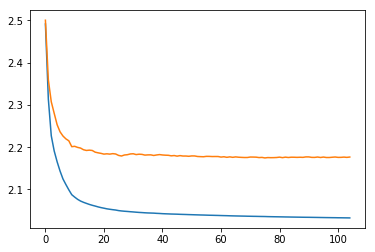

In [78]:
plt.plot(progress['train_set']['rmse'])
plt.plot(progress['validation_set']['rmse'])
plt.show()

In [80]:
params2 = {'max_depth': 2, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}

In [81]:
progress2 = {}
xgb_model_2_001_05 = xgboost.train(params2, xg_cv_train,early_stopping_rounds=30,evals = [(xg_cv_train , "train_set"),(xg_cv_val,"validation_set")], evals_result=progress2
                                         ,num_boost_round=1000)

[0]	train_set-rmse:2.98468	validation_set-rmse:2.91269
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:2.97082	validation_set-rmse:2.90113
[2]	train_set-rmse:2.95724	validation_set-rmse:2.88985
[3]	train_set-rmse:2.94386	validation_set-rmse:2.8787
[4]	train_set-rmse:2.93066	validation_set-rmse:2.86774
[5]	train_set-rmse:2.91768	validation_set-rmse:2.85696
[6]	train_set-rmse:2.90487	validation_set-rmse:2.8463
[7]	train_set-rmse:2.89221	validation_set-rmse:2.83576
[8]	train_set-rmse:2.87978	validation_set-rmse:2.82546
[9]	train_set-rmse:2.86753	validation_set-rmse:2.81531
[10]	train_set-rmse:2.8555	validation_set-rmse:2.80533
[11]	train_set-rmse:2.84364	validation_set-rmse:2.79554
[12]	train_set-rmse:2.83191	validation_set-rmse:2.7859
[13]	train_set-rmse:2.82038	validation_set-rmse:2.77644
[14]	train_set-rmse:2.80909	validation_set-rmse:2.76717
[15]	train_

[144]	train_set-rmse:2.17074	validation_set-rmse:2.25314
[145]	train_set-rmse:2.16917	validation_set-rmse:2.25214
[146]	train_set-rmse:2.16755	validation_set-rmse:2.25071
[147]	train_set-rmse:2.16598	validation_set-rmse:2.24954
[148]	train_set-rmse:2.16439	validation_set-rmse:2.2483
[149]	train_set-rmse:2.16286	validation_set-rmse:2.24731
[150]	train_set-rmse:2.16134	validation_set-rmse:2.24614
[151]	train_set-rmse:2.15979	validation_set-rmse:2.24495
[152]	train_set-rmse:2.15833	validation_set-rmse:2.24369
[153]	train_set-rmse:2.15686	validation_set-rmse:2.24278
[154]	train_set-rmse:2.15547	validation_set-rmse:2.24175
[155]	train_set-rmse:2.15411	validation_set-rmse:2.24086
[156]	train_set-rmse:2.1527	validation_set-rmse:2.23993
[157]	train_set-rmse:2.15123	validation_set-rmse:2.23897
[158]	train_set-rmse:2.14984	validation_set-rmse:2.23776
[159]	train_set-rmse:2.14841	validation_set-rmse:2.23685
[160]	train_set-rmse:2.14698	validation_set-rmse:2.2364
[161]	train_set-rmse:2.14567	valid

[289]	train_set-rmse:2.05735	validation_set-rmse:2.1804
[290]	train_set-rmse:2.05703	validation_set-rmse:2.1802
[291]	train_set-rmse:2.05672	validation_set-rmse:2.18001
[292]	train_set-rmse:2.05632	validation_set-rmse:2.17998
[293]	train_set-rmse:2.05602	validation_set-rmse:2.17985
[294]	train_set-rmse:2.05574	validation_set-rmse:2.17968
[295]	train_set-rmse:2.05536	validation_set-rmse:2.17965
[296]	train_set-rmse:2.0551	validation_set-rmse:2.17943
[297]	train_set-rmse:2.05472	validation_set-rmse:2.17941
[298]	train_set-rmse:2.05444	validation_set-rmse:2.17913
[299]	train_set-rmse:2.05417	validation_set-rmse:2.17889
[300]	train_set-rmse:2.0539	validation_set-rmse:2.17874
[301]	train_set-rmse:2.05363	validation_set-rmse:2.17856
[302]	train_set-rmse:2.05338	validation_set-rmse:2.17844
[303]	train_set-rmse:2.05312	validation_set-rmse:2.17827
[304]	train_set-rmse:2.05276	validation_set-rmse:2.17824
[305]	train_set-rmse:2.0525	validation_set-rmse:2.17804
[306]	train_set-rmse:2.05225	validat

[434]	train_set-rmse:2.0293	validation_set-rmse:2.16018
[435]	train_set-rmse:2.02917	validation_set-rmse:2.16008
[436]	train_set-rmse:2.02907	validation_set-rmse:2.16003
[437]	train_set-rmse:2.02897	validation_set-rmse:2.15991
[438]	train_set-rmse:2.02877	validation_set-rmse:2.15979
[439]	train_set-rmse:2.02865	validation_set-rmse:2.15978
[440]	train_set-rmse:2.02841	validation_set-rmse:2.15922
[441]	train_set-rmse:2.02828	validation_set-rmse:2.15912
[442]	train_set-rmse:2.02816	validation_set-rmse:2.15909
[443]	train_set-rmse:2.02806	validation_set-rmse:2.15906
[444]	train_set-rmse:2.02798	validation_set-rmse:2.15897
[445]	train_set-rmse:2.02786	validation_set-rmse:2.15894
[446]	train_set-rmse:2.02776	validation_set-rmse:2.15886
[447]	train_set-rmse:2.02765	validation_set-rmse:2.15879
[448]	train_set-rmse:2.02757	validation_set-rmse:2.15879
[449]	train_set-rmse:2.02746	validation_set-rmse:2.15876
[450]	train_set-rmse:2.02735	validation_set-rmse:2.15871
[451]	train_set-rmse:2.02727	val

[579]	train_set-rmse:2.01616	validation_set-rmse:2.14909
[580]	train_set-rmse:2.01612	validation_set-rmse:2.14906
[581]	train_set-rmse:2.01608	validation_set-rmse:2.14908
[582]	train_set-rmse:2.01603	validation_set-rmse:2.14905
[583]	train_set-rmse:2.01596	validation_set-rmse:2.14906
[584]	train_set-rmse:2.01592	validation_set-rmse:2.14902
[585]	train_set-rmse:2.01581	validation_set-rmse:2.14904
[586]	train_set-rmse:2.01563	validation_set-rmse:2.14861
[587]	train_set-rmse:2.01557	validation_set-rmse:2.14855
[588]	train_set-rmse:2.01553	validation_set-rmse:2.14852
[589]	train_set-rmse:2.01549	validation_set-rmse:2.14851
[590]	train_set-rmse:2.01542	validation_set-rmse:2.14852
[591]	train_set-rmse:2.01538	validation_set-rmse:2.14852
[592]	train_set-rmse:2.01532	validation_set-rmse:2.14846
[593]	train_set-rmse:2.0152	validation_set-rmse:2.14835
[594]	train_set-rmse:2.01516	validation_set-rmse:2.14835
[595]	train_set-rmse:2.01512	validation_set-rmse:2.14831
[596]	train_set-rmse:2.01506	val

[724]	train_set-rmse:2.00717	validation_set-rmse:2.14273
[725]	train_set-rmse:2.00712	validation_set-rmse:2.14272
[726]	train_set-rmse:2.00708	validation_set-rmse:2.1427
[727]	train_set-rmse:2.00705	validation_set-rmse:2.14269
[728]	train_set-rmse:2.007	validation_set-rmse:2.14266
[729]	train_set-rmse:2.00696	validation_set-rmse:2.14265
[730]	train_set-rmse:2.00691	validation_set-rmse:2.14268
[731]	train_set-rmse:2.00688	validation_set-rmse:2.14268
[732]	train_set-rmse:2.00686	validation_set-rmse:2.14266
[733]	train_set-rmse:2.00682	validation_set-rmse:2.14264
[734]	train_set-rmse:2.00672	validation_set-rmse:2.14255
[735]	train_set-rmse:2.00669	validation_set-rmse:2.14256
[736]	train_set-rmse:2.00663	validation_set-rmse:2.14253
[737]	train_set-rmse:2.00661	validation_set-rmse:2.14253
[738]	train_set-rmse:2.00657	validation_set-rmse:2.14247
[739]	train_set-rmse:2.00655	validation_set-rmse:2.14247
[740]	train_set-rmse:2.0065	validation_set-rmse:2.14244
[741]	train_set-rmse:2.00645	valida

[869]	train_set-rmse:1.99968	validation_set-rmse:2.13784
[870]	train_set-rmse:1.99964	validation_set-rmse:2.13781
[871]	train_set-rmse:1.9996	validation_set-rmse:2.13774
[872]	train_set-rmse:1.99957	validation_set-rmse:2.1377
[873]	train_set-rmse:1.99954	validation_set-rmse:2.13768
[874]	train_set-rmse:1.99951	validation_set-rmse:2.13763
[875]	train_set-rmse:1.99948	validation_set-rmse:2.13761
[876]	train_set-rmse:1.99946	validation_set-rmse:2.13759
[877]	train_set-rmse:1.99942	validation_set-rmse:2.13755
[878]	train_set-rmse:1.99939	validation_set-rmse:2.13754
[879]	train_set-rmse:1.99935	validation_set-rmse:2.13756
[880]	train_set-rmse:1.99933	validation_set-rmse:2.13754
[881]	train_set-rmse:1.99911	validation_set-rmse:2.13736
[882]	train_set-rmse:1.99908	validation_set-rmse:2.13735
[883]	train_set-rmse:1.99904	validation_set-rmse:2.13727
[884]	train_set-rmse:1.99893	validation_set-rmse:2.13712
[885]	train_set-rmse:1.9989	validation_set-rmse:2.13709
[886]	train_set-rmse:1.99886	valid

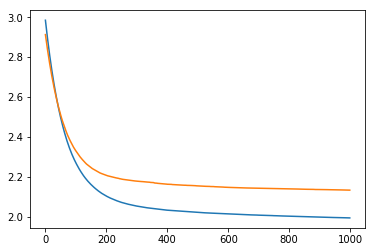

In [82]:
plt.plot(progress2['train_set']['rmse'])
plt.plot(progress2['validation_set']['rmse'])
plt.show()

In [84]:
params3 = {'max_depth': 3, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 1,'eval_metric': 'rmse'}

In [85]:
progress3 = {}
xgb_model_3_001_1 = xgboost.train(params3, xg_cv_train,early_stopping_rounds=30,evals = [(xg_cv_train , "train_set"),(xg_cv_val,"validation_set")], evals_result=progress3
                                         ,num_boost_round=1000)

[0]	train_set-rmse:2.98365	validation_set-rmse:2.91131
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:2.96883	validation_set-rmse:2.89836
[2]	train_set-rmse:2.95424	validation_set-rmse:2.88564
[3]	train_set-rmse:2.93987	validation_set-rmse:2.87312
[4]	train_set-rmse:2.92571	validation_set-rmse:2.86082
[5]	train_set-rmse:2.91177	validation_set-rmse:2.84871
[6]	train_set-rmse:2.89803	validation_set-rmse:2.83684
[7]	train_set-rmse:2.88451	validation_set-rmse:2.82517
[8]	train_set-rmse:2.87119	validation_set-rmse:2.81365
[9]	train_set-rmse:2.85807	validation_set-rmse:2.80237
[10]	train_set-rmse:2.84516	validation_set-rmse:2.79128
[11]	train_set-rmse:2.83244	validation_set-rmse:2.78037
[12]	train_set-rmse:2.82001	validation_set-rmse:2.76969
[13]	train_set-rmse:2.80769	validation_set-rmse:2.75918
[14]	train_set-rmse:2.79564	validation_set-rmse:2.74887
[15]	tr

[144]	train_set-rmse:2.11586	validation_set-rmse:2.20406
[145]	train_set-rmse:2.11434	validation_set-rmse:2.20295
[146]	train_set-rmse:2.11267	validation_set-rmse:2.20167
[147]	train_set-rmse:2.11103	validation_set-rmse:2.20039
[148]	train_set-rmse:2.10941	validation_set-rmse:2.19918
[149]	train_set-rmse:2.10798	validation_set-rmse:2.1981
[150]	train_set-rmse:2.10651	validation_set-rmse:2.19734
[151]	train_set-rmse:2.10496	validation_set-rmse:2.19613
[152]	train_set-rmse:2.10343	validation_set-rmse:2.19499
[153]	train_set-rmse:2.10209	validation_set-rmse:2.19403
[154]	train_set-rmse:2.10061	validation_set-rmse:2.19288
[155]	train_set-rmse:2.09932	validation_set-rmse:2.19197
[156]	train_set-rmse:2.09797	validation_set-rmse:2.1913
[157]	train_set-rmse:2.09655	validation_set-rmse:2.19025
[158]	train_set-rmse:2.09532	validation_set-rmse:2.18938
[159]	train_set-rmse:2.09394	validation_set-rmse:2.18834
[160]	train_set-rmse:2.09274	validation_set-rmse:2.18746
[161]	train_set-rmse:2.09137	vali

[289]	train_set-rmse:2.01206	validation_set-rmse:2.13331
[290]	train_set-rmse:2.01174	validation_set-rmse:2.13309
[291]	train_set-rmse:2.01125	validation_set-rmse:2.13243
[292]	train_set-rmse:2.01103	validation_set-rmse:2.13235
[293]	train_set-rmse:2.01072	validation_set-rmse:2.13199
[294]	train_set-rmse:2.01041	validation_set-rmse:2.13173
[295]	train_set-rmse:2.01019	validation_set-rmse:2.13166
[296]	train_set-rmse:2.00992	validation_set-rmse:2.13152
[297]	train_set-rmse:2.00945	validation_set-rmse:2.13088
[298]	train_set-rmse:2.00922	validation_set-rmse:2.13083
[299]	train_set-rmse:2.00892	validation_set-rmse:2.13057
[300]	train_set-rmse:2.00871	validation_set-rmse:2.13047
[301]	train_set-rmse:2.00826	validation_set-rmse:2.12984
[302]	train_set-rmse:2.00805	validation_set-rmse:2.12964
[303]	train_set-rmse:2.00783	validation_set-rmse:2.12961
[304]	train_set-rmse:2.00754	validation_set-rmse:2.12937
[305]	train_set-rmse:2.00729	validation_set-rmse:2.12925
[306]	train_set-rmse:2.0071	val

[434]	train_set-rmse:1.98402	validation_set-rmse:2.11058
[435]	train_set-rmse:1.98394	validation_set-rmse:2.11055
[436]	train_set-rmse:1.98379	validation_set-rmse:2.11054
[437]	train_set-rmse:1.98371	validation_set-rmse:2.11043
[438]	train_set-rmse:1.98355	validation_set-rmse:2.11043
[439]	train_set-rmse:1.98348	validation_set-rmse:2.11038
[440]	train_set-rmse:1.98331	validation_set-rmse:2.11033
[441]	train_set-rmse:1.98322	validation_set-rmse:2.11024
[442]	train_set-rmse:1.98313	validation_set-rmse:2.11017
[443]	train_set-rmse:1.98304	validation_set-rmse:2.11005
[444]	train_set-rmse:1.9829	validation_set-rmse:2.11004
[445]	train_set-rmse:1.98282	validation_set-rmse:2.10999
[446]	train_set-rmse:1.98274	validation_set-rmse:2.1099
[447]	train_set-rmse:1.98259	validation_set-rmse:2.10989
[448]	train_set-rmse:1.98252	validation_set-rmse:2.10988
[449]	train_set-rmse:1.98232	validation_set-rmse:2.10982
[450]	train_set-rmse:1.98226	validation_set-rmse:2.1098
[451]	train_set-rmse:1.98217	valid

[579]	train_set-rmse:1.9699	validation_set-rmse:2.10407
[580]	train_set-rmse:1.96982	validation_set-rmse:2.10408
[581]	train_set-rmse:1.96977	validation_set-rmse:2.10408
[582]	train_set-rmse:1.96963	validation_set-rmse:2.10409
[583]	train_set-rmse:1.96955	validation_set-rmse:2.10411
[584]	train_set-rmse:1.96951	validation_set-rmse:2.1041
[585]	train_set-rmse:1.96942	validation_set-rmse:2.10407
[586]	train_set-rmse:1.96934	validation_set-rmse:2.10409
[587]	train_set-rmse:1.96929	validation_set-rmse:2.10405
[588]	train_set-rmse:1.96924	validation_set-rmse:2.10408
[589]	train_set-rmse:1.96918	validation_set-rmse:2.10401
[590]	train_set-rmse:1.9691	validation_set-rmse:2.10403
[591]	train_set-rmse:1.96907	validation_set-rmse:2.10402
[592]	train_set-rmse:1.96893	validation_set-rmse:2.10401
[593]	train_set-rmse:1.96885	validation_set-rmse:2.10394
[594]	train_set-rmse:1.96876	validation_set-rmse:2.10389
[595]	train_set-rmse:1.96863	validation_set-rmse:2.10392
[596]	train_set-rmse:1.96859	valid

[724]	train_set-rmse:1.95907	validation_set-rmse:2.09661
[725]	train_set-rmse:1.95905	validation_set-rmse:2.0966
[726]	train_set-rmse:1.95894	validation_set-rmse:2.09651
[727]	train_set-rmse:1.95885	validation_set-rmse:2.09646
[728]	train_set-rmse:1.95881	validation_set-rmse:2.09645
[729]	train_set-rmse:1.95876	validation_set-rmse:2.09603
[730]	train_set-rmse:1.95871	validation_set-rmse:2.09606
[731]	train_set-rmse:1.95863	validation_set-rmse:2.09605
[732]	train_set-rmse:1.95861	validation_set-rmse:2.09604
[733]	train_set-rmse:1.95857	validation_set-rmse:2.09595
[734]	train_set-rmse:1.9585	validation_set-rmse:2.09596
[735]	train_set-rmse:1.95845	validation_set-rmse:2.0956
[736]	train_set-rmse:1.95833	validation_set-rmse:2.0955
[737]	train_set-rmse:1.95827	validation_set-rmse:2.09515
[738]	train_set-rmse:1.95816	validation_set-rmse:2.09513
[739]	train_set-rmse:1.95815	validation_set-rmse:2.09512
[740]	train_set-rmse:1.95807	validation_set-rmse:2.09513
[741]	train_set-rmse:1.95799	valida

[869]	train_set-rmse:1.95107	validation_set-rmse:2.08813
[870]	train_set-rmse:1.95104	validation_set-rmse:2.0881
[871]	train_set-rmse:1.95097	validation_set-rmse:2.08812
[872]	train_set-rmse:1.95095	validation_set-rmse:2.0881
[873]	train_set-rmse:1.95087	validation_set-rmse:2.0881
[874]	train_set-rmse:1.95079	validation_set-rmse:2.08812
[875]	train_set-rmse:1.95076	validation_set-rmse:2.08809
[876]	train_set-rmse:1.95075	validation_set-rmse:2.08809
[877]	train_set-rmse:1.95073	validation_set-rmse:2.08807
[878]	train_set-rmse:1.95064	validation_set-rmse:2.088
[879]	train_set-rmse:1.95055	validation_set-rmse:2.08801
[880]	train_set-rmse:1.9505	validation_set-rmse:2.08802
[881]	train_set-rmse:1.95043	validation_set-rmse:2.08798
[882]	train_set-rmse:1.95034	validation_set-rmse:2.08798
[883]	train_set-rmse:1.95027	validation_set-rmse:2.08802
[884]	train_set-rmse:1.95023	validation_set-rmse:2.08803
[885]	train_set-rmse:1.95018	validation_set-rmse:2.088
[886]	train_set-rmse:1.9501	validation_

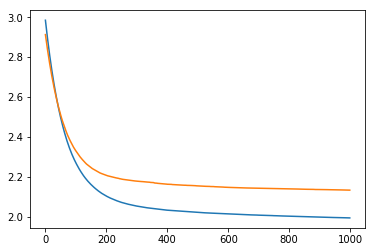

In [86]:
plt.plot(progress2['train_set']['rmse'])
plt.plot(progress2['validation_set']['rmse'])
plt.show()

In [56]:
lm_model= LinearRegression()

In [67]:
X_for_lm = train_full_imputed.drop(['item_cnt_month','shop_id','item_id','item_category_id','unique'],axis = 1)
y_for_lm = train_full_imputed['item_cnt_month']

In [68]:
X2 = sm.add_constant(X_for_lm)
est = sm.OLS(y_for_lm, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         item_cnt_month   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                 4.085e+04
Date:                Wed, 17 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:53:15   Log-Likelihood:            -3.4781e+06
No. Observations:             1545898   AIC:                         6.956e+06
Df Residuals:                 1545887   BIC:                         6.956e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [577]:
#Mean of 15 nearest neighbours in terms of item ids.
from sklearn.neighbors import NearestNeighbors

In [579]:
for_nn = test_imputed_new_prev_cat_mean_no_trim['item_id'].drop_duplicates()

In [580]:
neigh = NearestNeighbors(n_neighbors=15)

In [581]:
neigh.fit(np.expand_dims(for_nn,-1))

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=15, p=2, radius=1.0)

In [582]:
vio = neigh.kneighbors(np.expand_dims(for_nn,-1))

In [583]:
nn15 = nn = pd.DataFrame({'neigbor1':vio[1][:,0],
                          'neigbor2':vio[1][:,1],
                          'neigbor3':vio[1][:,2],
                          'neigbor4':vio[1][:,3],
                          'neigbor5':vio[1][:,4],
                          'neigbor6':vio[1][:,5],
                          'neigbor7':vio[1][:,6],
                          'neigbor8':vio[1][:,7],
                          'neigbor9':vio[1][:,8],
                          'neigbor10':vio[1][:,9],
                          'neigbor11':vio[1][:,10],
                          'neigbor12':vio[1][:,11],
                          'neigbor13':vio[1][:,12],
                          'neigbor14':vio[1][:,13],
                          'neigbor15':vio[1][:,14],
                          'item_id':for_nn.values})

In [584]:
submit = test_imputed_new_prev_cat_mean_no_trim.copy()

In [585]:
submit = submit.merge(nn15, on='item_id', how = 'left')

In [586]:
submit.loc[pd.isnull(submit['item_category_id']),'lag2_only_item'] = np.nansum(
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag2_only_item'][x])/14], axis = 0)        

In [587]:
submit.loc[pd.isnull(submit['item_category_id']),'lag2_only_item_cat'] = np.nansum(
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 ], axis = 0)      

In [588]:
submit.loc[pd.isnull(submit['item_category_id']),'lag2_shop_item_comb'] = np.nansum(
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14],axis = 0)        

In [589]:
submit.loc[pd.isnull(submit['item_category_id']),'lag_only_item'] = np.nansum(
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag_only_item'][x])/14], axis = 0)       

In [590]:
submit.loc[pd.isnull(submit['item_category_id']),'lag_only_item_cat'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag_only_item_cat'][x])/14 ], axis = 0)      

In [591]:
submit.loc[pd.isnull(submit['item_category_id']),'lag_shop_item_comb'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 ], axis = 0)   

In [592]:
submit.loc[pd.isnull(submit['item_category_id']),'prev_month_category_mean'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['prev_month_category_mean'][x])/14 ], axis = 0)   

In [593]:
submit.loc[pd.isnull(submit['item_category_id']),'item_price'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['item_price'][x])/14 ], axis = 0)

In [594]:
submit.loc[pd.isnull(submit['item_category_id']),'is_music'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['is_music'][x])/14 ], axis = 0)

In [595]:
submit['is_music'].head()

0        False
1     0.714286
2        False
3        False
4    0.0714286
Name: is_music, dtype: object

In [596]:
submit.loc[submit['is_music']>0.5, 'is_music'] = 1
submit.loc[submit['is_music']<=0.5, 'is_music'] = 0

In [597]:
submit['is_music'].head()

0    0
1    1
2    0
3    0
4    0
Name: is_music, dtype: object

In [598]:
xg_cv_train.feature_names

['item_price',
 'is_music',
 'lag_shop_item_comb',
 'lag_only_item',
 'lag_only_item_cat',
 'lag2_only_item_cat',
 'lag2_shop_item_comb',
 'lag2_only_item',
 'seasonal_freq_3_feature',
 'prev_month_category_mean']

In [608]:
submit.head()

,shop_id,ID,item_id,item_category_id,indicator,is_music,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,...,neigbor14,neigbor15,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9
0,5,0,5037,19.0,1,0,3.793103,2.312028,1.000000,25.000000,...,3808,4989,2487,1935,4828,5,6,1575,967,1873
1,5,1,5320,NaN,0,1,1.080619,1.397751,0.285714,7.928571,...,4371,4372,8,3516,1576,2480,2479,2488,971,2481
2,5,2,5233,19.0,2,0,2.666667,2.312028,3.000000,42.000000,...,4376,3920,3,3512,2844,966,1574,2485,1881,1128
3,5,3,5232,23.0,1,0,1.846154,2.201104,0.000000,28.000000,...,2843,3920,2,3512,2844,966,1574,2485,1881,1128
4,5,4,5268,NaN,0,0,1.173535,2.508807,0.285714,9.285714,...,3,2488,965,2843,3920,4373,2485,1574,4372,966


In [606]:
submit_req = submit[xg_cv_train.feature_names].copy()

In [607]:
submit_req.head()

,item_price,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature,prev_month_category_mean
0,1960.580473,0,0.000000,25.000000,2443.000000,2.312028,1.000000,3.793103,-0.047512,1.647497
1,770.666141,1,0.142857,7.928571,2242.214286,1.397751,0.285714,1.080619,NaN,1.217645
2,844.516003,0,1.000000,42.000000,2443.000000,2.312028,3.000000,2.666667,-0.047512,1.647497
3,792.527697,0,0.000000,28.000000,2203.000000,2.201104,0.000000,1.846154,-0.047512,1.635682
4,1223.071905,0,0.214286,9.285714,2251.071429,2.508807,0.285714,1.173535,NaN,1.829085


In [602]:
#Training xg_cv_full with params3, but wait an extra column, so recreating it.

In [603]:
train_full_imputed.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature,prev_month_category_mean
63224,0,30,1,265.0,31.0,40,0.0,0.0,0.0,33489.0,0.0,0.0,0.0,-0.047512,1.864851
63225,0,31,1,434.0,11.0,37,0.0,0.0,0.0,6094.0,0.0,0.0,0.0,-0.047512,1.448538
63226,0,32,1,221.0,10.0,40,0.0,6.0,299.0,33489.0,0.0,0.0,0.0,-0.047512,1.864851
63227,0,33,1,347.0,3.0,37,0.0,3.0,61.0,6094.0,0.0,0.0,0.0,-0.047512,1.448538
63228,0,35,1,247.0,14.0,40,0.0,1.0,78.0,33489.0,0.0,0.0,0.0,-0.047512,1.864851


In [604]:
xg_full = xgboost.DMatrix(train_full_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_full_imputed['item_cnt_month'])

In [356]:
xg_fin_model = xgboost.train(params3,xg_full,early_stopping_rounds=30,evals = [(xg_full,"full_train_set")],num_boost_round=1000)

[0]	full_train_set-rmse:2.98222
Will train until full_train_set-rmse hasn't improved in 30 rounds.
[1]	full_train_set-rmse:2.96746
[2]	full_train_set-rmse:2.95293
[3]	full_train_set-rmse:2.93861
[4]	full_train_set-rmse:2.92451
[5]	full_train_set-rmse:2.91062
[6]	full_train_set-rmse:2.89695
[7]	full_train_set-rmse:2.88348
[8]	full_train_set-rmse:2.87021
[9]	full_train_set-rmse:2.85716
[10]	full_train_set-rmse:2.8443
[11]	full_train_set-rmse:2.83164
[12]	full_train_set-rmse:2.81928
[13]	full_train_set-rmse:2.8071
[14]	full_train_set-rmse:2.79501
[15]	full_train_set-rmse:2.7832
[16]	full_train_set-rmse:2.77127
[17]	full_train_set-rmse:2.75982
[18]	full_train_set-rmse:2.74845
[19]	full_train_set-rmse:2.73735
[20]	full_train_set-rmse:2.7261
[21]	full_train_set-rmse:2.71534
[22]	full_train_set-rmse:2.70446
[23]	full_train_set-rmse:2.69403
[24]	full_train_set-rmse:2.68367
[25]	full_train_set-rmse:2.67356
[26]	full_train_set-rmse:2.66328
[27]	full_train_set-rmse:2.65315
[28]	full_train_set-rms

[243]	full_train_set-rmse:2.03098
[244]	full_train_set-rmse:2.03059
[245]	full_train_set-rmse:2.03012
[246]	full_train_set-rmse:2.02972
[247]	full_train_set-rmse:2.02923
[248]	full_train_set-rmse:2.02885
[249]	full_train_set-rmse:2.0284
[250]	full_train_set-rmse:2.02802
[251]	full_train_set-rmse:2.02756
[252]	full_train_set-rmse:2.0272
[253]	full_train_set-rmse:2.02676
[254]	full_train_set-rmse:2.0264
[255]	full_train_set-rmse:2.02596
[256]	full_train_set-rmse:2.02562
[257]	full_train_set-rmse:2.02517
[258]	full_train_set-rmse:2.02483
[259]	full_train_set-rmse:2.02441
[260]	full_train_set-rmse:2.02408
[261]	full_train_set-rmse:2.02366
[262]	full_train_set-rmse:2.02333
[263]	full_train_set-rmse:2.02293
[264]	full_train_set-rmse:2.02261
[265]	full_train_set-rmse:2.0222
[266]	full_train_set-rmse:2.02185
[267]	full_train_set-rmse:2.02143
[268]	full_train_set-rmse:2.02104
[269]	full_train_set-rmse:2.02074
[270]	full_train_set-rmse:2.02036
[271]	full_train_set-rmse:2.02008
[272]	full_train_s

[485]	full_train_set-rmse:1.98166
[486]	full_train_set-rmse:1.98161
[487]	full_train_set-rmse:1.98154
[488]	full_train_set-rmse:1.98141
[489]	full_train_set-rmse:1.98135
[490]	full_train_set-rmse:1.98114
[491]	full_train_set-rmse:1.98106
[492]	full_train_set-rmse:1.98089
[493]	full_train_set-rmse:1.98084
[494]	full_train_set-rmse:1.98066
[495]	full_train_set-rmse:1.98057
[496]	full_train_set-rmse:1.98053
[497]	full_train_set-rmse:1.98028
[498]	full_train_set-rmse:1.98014
[499]	full_train_set-rmse:1.98007
[500]	full_train_set-rmse:1.98002
[501]	full_train_set-rmse:1.97994
[502]	full_train_set-rmse:1.97987
[503]	full_train_set-rmse:1.97976
[504]	full_train_set-rmse:1.97968
[505]	full_train_set-rmse:1.97963
[506]	full_train_set-rmse:1.97949
[507]	full_train_set-rmse:1.97936
[508]	full_train_set-rmse:1.97931
[509]	full_train_set-rmse:1.97926
[510]	full_train_set-rmse:1.97918
[511]	full_train_set-rmse:1.97903
[512]	full_train_set-rmse:1.97899
[513]	full_train_set-rmse:1.97888
[514]	full_tra

[727]	full_train_set-rmse:1.96192
[728]	full_train_set-rmse:1.96187
[729]	full_train_set-rmse:1.96181
[730]	full_train_set-rmse:1.96171
[731]	full_train_set-rmse:1.96162
[732]	full_train_set-rmse:1.96154
[733]	full_train_set-rmse:1.96142
[734]	full_train_set-rmse:1.96137
[735]	full_train_set-rmse:1.96135
[736]	full_train_set-rmse:1.96129
[737]	full_train_set-rmse:1.96118
[738]	full_train_set-rmse:1.96112
[739]	full_train_set-rmse:1.96107
[740]	full_train_set-rmse:1.96099
[741]	full_train_set-rmse:1.96094
[742]	full_train_set-rmse:1.96086
[743]	full_train_set-rmse:1.96081
[744]	full_train_set-rmse:1.9607
[745]	full_train_set-rmse:1.96067
[746]	full_train_set-rmse:1.96062
[747]	full_train_set-rmse:1.96057
[748]	full_train_set-rmse:1.96049
[749]	full_train_set-rmse:1.96046
[750]	full_train_set-rmse:1.96038
[751]	full_train_set-rmse:1.96033
[752]	full_train_set-rmse:1.96025
[753]	full_train_set-rmse:1.96014
[754]	full_train_set-rmse:1.96009
[755]	full_train_set-rmse:1.96003
[756]	full_trai

[969]	full_train_set-rmse:1.94932
[970]	full_train_set-rmse:1.94931
[971]	full_train_set-rmse:1.94924
[972]	full_train_set-rmse:1.94921
[973]	full_train_set-rmse:1.9492
[974]	full_train_set-rmse:1.94917
[975]	full_train_set-rmse:1.94913
[976]	full_train_set-rmse:1.94906
[977]	full_train_set-rmse:1.94898
[978]	full_train_set-rmse:1.94891
[979]	full_train_set-rmse:1.94884
[980]	full_train_set-rmse:1.94878
[981]	full_train_set-rmse:1.94874
[982]	full_train_set-rmse:1.94873
[983]	full_train_set-rmse:1.94871
[984]	full_train_set-rmse:1.94869
[985]	full_train_set-rmse:1.94866
[986]	full_train_set-rmse:1.94862
[987]	full_train_set-rmse:1.94859
[988]	full_train_set-rmse:1.94858
[989]	full_train_set-rmse:1.94855
[990]	full_train_set-rmse:1.94851
[991]	full_train_set-rmse:1.94844
[992]	full_train_set-rmse:1.94838
[993]	full_train_set-rmse:1.94835
[994]	full_train_set-rmse:1.94829
[995]	full_train_set-rmse:1.94826
[996]	full_train_set-rmse:1.94825
[997]	full_train_set-rmse:1.94821
[998]	full_trai

In [357]:
lm_fin_model = LinearRegression()

In [359]:
X_for_lm = train_full_imputed.drop(['item_cnt_month','shop_id','item_id','item_category_id','unique'],axis = 1)
y_for_lm = train_full_imputed['item_cnt_month']

In [360]:
lm_fin_model.fit(X_for_lm,y_for_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [361]:
submit_req.columns

Index(['item_price', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature',
       'prev_month_category_mean'],
      dtype='object')

In [605]:
submit_req['is_music'] = submit_req['is_music'].astype(np.float)

In [367]:
submit_req = submit_req[xg_full.feature_names]

In [368]:
submit_req_test = xgboost.DMatrix(submit_req)

In [369]:
test_pred_xg_fin = xg_fin_model.predict(submit_req_test)

In [370]:
test_lm_fin = lm_fin_model.predict(submit_req)

In [ ]:
#Finding the best alpha. For ensembling.

In [414]:
find_best_alpha_xg_val = xgb_model_3_001_1.predict(xg_cv_val)

In [413]:
lm_model_val_for_alpha = LinearRegression().fit(train_33.drop(['item_cnt_month','shop_id','item_id','item_category_id','unique'],axis = 1), train_33['item_cnt_month'])

In [418]:
find_best_alpha_lin_val = lm_model_val_for_alpha.predict(val_33.drop(['item_cnt_month','shop_id','item_id','item_category_id','unique'],axis = 1))

In [407]:
from tqdm import tqdm

In [426]:
#First finding best alpha for ensembling on val set. alpha*lin + (1-alpha)*xgb
alphas = np.arange(0,1,0.001)
best_alpha = 0
best_error = rmse(find_best_alpha_xg_val.copy(),val_33['item_cnt_month'].copy())
for alpha in tqdm(alphas):
    temp_pred = alpha*find_best_alpha_lin_val + (1-alpha)*find_best_alpha_xg_val
    temp_error = rmse(temp_pred.copy() , val_33['item_cnt_month'].copy())
    print(temp_error)
    if (temp_error < best_error):
        best_alpha= alpha
        best_error = temp_error

  4%|▎         | 35/1000 [00:00<00:05, 170.79it/s]

2.0868781774277734
2.086882663131121
2.0868875803637383
2.086892935465662
2.086898724451378
2.086904941984467
2.086911594482342
2.0869186958212254
2.0869262200970162
2.0869341774882377
2.086942569362952
2.086951396838844
2.086960666474805
2.086970362904439
2.0869804912456136
2.0869910543151295
2.0870020552090947
2.0870134957663664
2.087025361695978
2.0870376655027947
2.0870504019195586
2.0870635765321275
2.0870771848974137
2.087091224982258
2.0871057007834115
2.0871206040187325
2.087135955211373
2.087151733161794
2.0871679396312133
2.0871845846511894
2.087201666408357
2.0872191880483832
2.087237134782341
2.0872555155499426
2.0872743329659738


  6%|▌         | 55/1000 [00:00<00:07, 134.46it/s]

2.0872935913375836
2.0873132755788113
2.087333390974189
2.0873539450790792
2.0873749337952794
2.0873963623560887
2.087418216489812
2.0874405071394553
2.0874632298907945
2.08748639665656
2.08750998550631
2.087534013841762
2.0875584676511947
2.087583365823531
2.0876087017266367
2.0876344570806316
2.0876606557297954
2.0876872869892233
2.0877143507882723
2.0877418522096804


  8%|▊         | 79/1000 [00:00<00:07, 127.75it/s]

2.0877697860119437
2.0877981505143666
2.087826948480678
2.0878561898550174
2.0878858598883254
2.0879159558191787
2.08794649156723
2.0879774571417182
2.0880088676160757
2.088040704821392
2.088072972870316
2.088105671470101
2.0881388113562993
2.0881723933913667
2.088206391171255
2.0882408290556356
2.0882757021083465
2.0883110110249468
2.0883467501511856
2.0883829230245756
2.088419531032052
2.0884565652882503
2.088494047831333
2.088531954974923


 10%|█         | 105/1000 [00:00<00:07, 127.61it/s]

2.088570288359235
2.088609061167832
2.088648267303117
2.0886879164990058
2.088727988575906
2.088768491984515
2.0888094328193865
2.0888508138994366
2.088892615254851
2.0889348554903617
2.0889775259344154
2.0890206330602914
2.089064175000972
2.0891081472070776
2.089152552271192
2.0891973913684607
2.0892426658759575
2.0892883695938105
2.0893345067742586
2.089381076671554
2.0894280723021588
2.0894755198906947
2.089523387808211
2.089571681290106
2.089620415884501
2.0896695846457356


 14%|█▎        | 137/1000 [00:01<00:06, 133.16it/s]

2.08971919078357
2.0897692204073977
2.089819686508484
2.08987057866589
2.08992191649353
2.089973679184906
2.0900258695829703
2.0900784973755124
2.090131558873949
2.0901850550478107
2.090238979564356
2.0902933358803075
2.090348122780044
2.0904033404214757
2.090459006961205
2.0905150913838613
2.090571604433297
2.0906285537173783
2.090685946664282
2.0907437566989713
2.090802002563788
2.0908606793996936
2.090919791693367
2.090979338573042
2.091039311975873
2.091099717628982
2.0911605541064504
2.0912218351706877
2.091283530108449
2.0913456636096606
2.091408227380407
2.0914712213966746
2.0915346574735674


 17%|█▋        | 167/1000 [00:01<00:06, 134.81it/s]

2.0915985178128036
2.091662804381803
2.091727523794405
2.091792675700642
2.091858273736043
2.0919242884475917
2.091990732426508
2.0920576113451106
2.092124930036223
2.0921926687215153
2.0922608438040524
2.0923294450500736
2.0923984749570264
2.0924679528923016
2.092537848128973
2.092608169901018
2.092678930745453
2.0927501183547856
2.0928217452255877
2.0928937965195256
2.0929662759291725
2.0930391888633864
2.093112539393466
2.093186309267523
2.093260512385912
2.093335144826444
2.093410207800042
2.09348571356651
2.093561635556855


 18%|█▊        | 182/1000 [00:01<00:06, 133.62it/s]

2.0936379934368294
2.093714777014495
2.0937919986062177
2.0938696480530536
2.0939477246905205
2.094026226372579
2.094105159402921
2.0941845407473525
2.0942643319414675
2.0943445539301315
2.094425211394525
2.0945062962617773
2.094587821094232
2.094669763728803
2.0947521391866095
2.0948349398631194
2.094918182188722
2.0950018462633078
2.0950859340602555
2.0951704581040484
2.09525540727164
2.0953407970229145
2.095426607864052
2.0955128447184723
2.095599509906729


 21%|██        | 209/1000 [00:01<00:06, 129.82it/s]

2.09568660210359
2.0957741421218055
2.0958620967039274
2.095950473360369
2.0960392853848684
2.096128539272952
2.096218202701714
2.096308301096815
2.096398829475391
2.096489781812224
2.096581174993942
2.09667298942377
2.096765229498919
2.0968578969276406
2.0969509941973565
2.097044528363709
2.097138482282272
2.0972328635174518
2.0973276700333874
2.097422918641148
2.0975185843372652
2.0976146789968433
2.0977111907776744

 24%|██▎       | 235/1000 [00:01<00:05, 128.34it/s]


2.097808141710924
2.09790553313446
2.0980033333172443
2.0981015636987377
2.098200224198604
2.0982993222617363
2.098398834524156
2.098498774807025
2.09859914105628
2.098699936801065
2.098801171016943
2.0989028182057723
2.099004896337311
2.099107401504581
2.099210328826661
2.0993136979295937
2.099417482747829
2.099521691374443
2.09962632585799
2.0997314063128325
2.0998368945461303
2.0999428092044026
2.1000491518011333


 26%|██▌       | 260/1000 [00:02<00:05, 127.47it/s]

2.100155920889932
2.1002631279147463
2.100370749855
2.100478797226167
2.100587273643092
2.1006961707782996
2.100805511682271
2.100915261833216
2.1010254372646657
2.1011360385268856
2.1012470804073304
2.1013585366561767
2.101470413108817
2.101582719908949
2.101695450731849
2.1018086197725245
2.1019221979442078
2.1020362066189042
2.1021506334998374
2.102265503383561
2.102380787763067
2.1024964926061145
2.102612623618692
2.102729179854511
2.1028461739177984
2.102963577949393


 28%|██▊       | 285/1000 [00:02<00:05, 125.91it/s]

2.103081405587951
2.1031996615150352
2.1033183382120777
2.1034374576629875
2.103556983837952
2.103676931974634
2.103797307921964
2.10391812150029
2.10403934294209
2.1041609916036568
2.104283063205403
2.104405557207709
2.10452848924124
2.104651830326374
2.1047755978129348
2.1048997843414665
2.1050243957672725
2.1051494452571795
2.1052749057708606
2.1054007849752736
2.1055270911802224
2.1056538329699532
2.1057809842827173


 31%|███       | 311/1000 [00:02<00:05, 125.81it/s]

2.1059085566645868
2.1060365527848393
2.106164972235835
2.106293830207325
2.1064230915957194
2.106552779250779
2.1066828872070804
2.1068134356688053
2.10694438840813
2.1070757620641216
2.1072075626952436
2.107339780161288
2.1074724341894044
2.107605501508015
2.107738984168639
2.107872891434694
2.1080072204132243
2.1081419848044547
2.108277155383896
2.108412747420698
2.1085487631025717
2.108685211064305
2.108822069184111
2.10895934688944
2.1090970427142
2.1092351629231625
2.109373718860672

 34%|███▎      | 337/1000 [00:02<00:05, 125.35it/s]


2.1095126754400573
2.1096520562924397
2.109791861447705
2.109932081318471
2.110072736313503
2.110213802241249
2.110355282168557
2.1104971869218088
2.110639525469221
2.110782267539886
2.1109254304030625
2.1110690142404986
2.1112130135620686
2.1113574501353267
2.111502293502141
2.1116475525617564
2.1117932312172805
2.11193933230484
2.1120858685647304
2.1122327987322556
2.1123801581746773
2.112527932062812
2.112676144872512
2.1128247564729152


 35%|███▌      | 350/1000 [00:02<00:05, 124.66it/s]

2.1129737851147405
2.1131232382016307
2.113273103828608
2.11342340692214
2.1135741131052246
2.1137252345444506
2.1138767762307884
2.1140287498323955
2.114181126859306
2.1143339227805797
2.1144871354609505
2.1146407625755876
2.1147948287759095
2.1149492936467174
2.115104176429664
2.115259476613396
2.115415192348364
2.1155713451493594
2.115727893305464
2.115884861134729
2.1160422483989225
2.1162000664409772
2.116358281135753
2.116516918356153
2.116675967131449


 38%|███▊      | 375/1000 [00:03<00:05, 124.18it/s]

2.1168354349116965
2.1169953360654383
2.11715563390709
2.1173163502973313
2.117477484187345
2.1176390318552296
2.1178010116354136
2.117963390439079
2.1181261876981696
2.1182893921260018
2.118453036804317
2.118617078291739
2.1187815352518338
2.1189464054791185
2.1191116925603137
2.1192774112825843
2.1194435234632096
2.1196100557025312
2.1197770002832343
2.119944376974688
2.1201121517315644
2.1202803407777613
2.1204489428360858
2.120617959695596


 40%|████      | 402/1000 [00:03<00:04, 124.67it/s]

2.120787407573636
2.120957250744222
2.1211275115600774
2.121298185707037
2.1214692664793406
2.121640785129247
2.1218127014748864
2.1219850247133323
2.122157764106076
2.122330936141798
2.122504500143441
2.1226784793909923
2.1228528707550613
2.123027674711274
2.1232029089710407
2.123378537307825
2.1235545777556593
2.123731031305344
2.123907899387229
2.124085194043977
2.1242628829441097
2.124440986424362
2.124619501117859
2.124798442736818
2.124977780665136
2.1251575302779293
2.125337690512512


 43%|████▎     | 429/1000 [00:03<00:04, 124.57it/s]

2.1255182606472336
2.1256992619396007
2.1258806550138476
2.126062460313645
2.126244672404859
2.1264273184726687
2.1266103557641007
2.1267938027988706
2.1269776601810295
2.1271619261602774
2.1273466254721782
2.1275317128052103
2.1277172109789113
2.12790311971218
2.128089437448469
2.1282761834342048
2.128463320712005
2.128650866140185
2.1288388262456075
2.1290272056138257
2.129215980285593
2.1294051662568254
2.129594757245491
2.1297847576599787
2.1299751861014
2.1301660049777564
2.130357232010765

 46%|████▌     | 455/1000 [00:03<00:04, 124.76it/s]


2.130548867466471
2.1307409129208525
2.13093338196313
2.131126242760618
2.131319508458682
2.131513182496175
2.1317072873315017
2.1319017766086885
2.1320966769205474
2.132291980634036
2.1324876961116783
2.132683833922094
2.1328803593801693
2.133077295783446
2.133274633321407
2.1334723832119815
2.1336705574946357
2.1338691185226515
2.134068083023426
2.1342674566951407
2.1344672570745544
2.134667441002152
2.1348680324574323
2.1350690325067734
2.1352704298317318
2.1354722599480693


 48%|████▊     | 481/1000 [00:03<00:04, 123.99it/s]

2.1356744759834
2.135877090909777
2.1360801168659025
2.1362835664940536
2.1364874000452287
2.1366916380466874
2.136896284284149
2.137101331277549
2.137306802823401
2.137512661256445
2.1377189229871387
2.137925588073067
2.1381326599736004
2.138340153787508
2.1385480304293965
2.138756311931393
2.138964997501979
2.139174104970145
2.139383597642125
2.1395934944129094


 50%|█████     | 505/1000 [00:04<00:04, 122.50it/s]

2.139803791881493
2.140014491726074
2.1402256184477038
2.140437123805512
2.1406490324625516
2.14086134313823
2.141074060162902
2.141287194926137
2.1415007141317206
2.1417146339418816
2.141928957657241
2.1421437021596885
2.142358826428029
2.142574355977843
2.1427902869853135
2.143006626640028
2.143223354651853
2.1434405009970487
2.1436580333405217
2.143875978522102
2.144094313506539
2.144313048579633


 53%|█████▎    | 530/1000 [00:04<00:03, 122.39it/s]

2.144532194383234
2.144751732410799
2.144971678809182
2.1451920177532138
2.1454127629080553
2.1456338970991062
2.1458554352362564
2.146077381241722
2.1462997170167393
2.1465224624516486
2.1467455951195107
2.14696913878608
2.1471930717645074
2.1474174121993452
2.147642142872322
2.1478672699684616
2.1480928038331073
2.148318731805011
2.1485450633486822
2.148771786887604
2.148998915585367
2.149226431932511
2.149454346797904
2.1496826701872824
2.149911376939088


 56%|█████▌    | 555/1000 [00:04<00:03, 122.16it/s]

2.1501404990721955
2.150370000038896
2.1505999110923275
2.1508302108557347
2.151060905079319
2.1512920106535836
2.151523495778614
2.1517553920917605
2.1519876734088355
2.152220362347626
2.152453435039834
2.152686905249379
2.1529207790323857
2.1531550421261643
2.1533897072086874
2.1536247597777334
2.153860217881555
2.1540960565418272
2.154332297202293
2.1545689381767077
2.1548059645494684
2.155043398346432
2.155281212913703
2.1555194337402637


 58%|█████▊    | 579/1000 [00:04<00:03, 121.86it/s]

2.1557580393617464
2.155997036074381
2.156236442245884
2.156476226429117
2.15671641753645
2.1569569921869753
2.1571979695311896
2.157439330519781
2.1576810970617055
2.157923241540207
2.15816578179123
2.1584087260493976
2.1586520485513923
2.1588957794485553
2.1591398879509542
2.1593844013057835
2.15962929762717
2.1598745811472044
2.1601202727129616
2.160366342349446
2.1606128127583397
2.1608596669413904
2.1611069227865465
2.161354557260715


 61%|██████    | 606/1000 [00:04<00:03, 122.19it/s]

2.1616025839269226
2.1618510118591314
2.1620998219615686
2.1623490319358583
2.1625986208479153
2.162848613464328
2.1630989801957337
2.16334974271612
2.1636009028179326
2.1638524424026424
2.1641043849846113
2.1643567035356717
2.1646094227282258
2.164862522451009
2.1651160063753103
2.1653698965058332
2.1656241597367103
2.16587882304022
2.166133867787289
2.1663893082396153
2.166645128771918
2.16690133715576
2.1671579432298187
2.167414926501522
2.167672309402878
2.1679300647241657
2.1681882257887284
2.168446757834827


 63%|██████▎   | 633/1000 [00:05<00:02, 122.44it/s]

2.168705690900444
2.1689649991319033
2.1692246936073314
2.1694847857858948
2.1697452564356983
2.1700061214586244
2.170267363188453
2.1705290029305853
2.1707910151942595
2.171053415058418
2.1713162113346454
2.1715793846733664
2.1718429526160343
2.1721068933770953
2.172371231772311
2.17263594409309
2.1729010429519304
2.1731665356911165
2.1734324021072693
2.1736986674195133
2.1739653032499233
2.174232335436973
2.174499738710286
2.1747675277158436
2.175035713125042


 65%|██████▍   | 646/1000 [00:05<00:02, 122.35it/s]

2.175304268232605
2.1755732189694372
2.175842543335592
2.17611226130741
2.176382351875533
2.1766528230881868
2.1769236907645397
2.1771949285553007
2.1774665609990986
2.177738563467171
2.1780109622105672
2.178283728918384
2.178556891115822
2.178830421504984
2.179104334679015
2.179378642603567
2.1796533179647852
2.179928387193772
2.180203825385092
2.1804796568673095
2.180755858933726
2.1810324397087983
2.1813094118921343


 67%|██████▋   | 672/1000 [00:05<00:02, 122.24it/s]

2.181586756016302
2.181864487765262
2.1821425907683736
2.182421086822831
2.182699949112516
2.182979190802035
2.1832588251189557
2.1835388250943812
2.183819219959099
2.1840999773150194
2.1843811289239237
2.1846626441171955
2.184944540414037
2.185226828164556
2.1855094804089603
2.185792522711702
2.186075932442381
2.186359731213821
2.186643896087952
2.186928438085561
2.1872133700647964
2.1874986684170667
2.18778435350269
2.1880704050436175
2.1883568468017254
2.188643651181309
2.188930833992043


 70%|███████   | 700/1000 [00:05<00:02, 122.58it/s]

2.189218404088938
2.189506337062497
2.1897946615863813
2.190083348439573
2.1903724239615205
2.190661861305806
2.1909516870359926
2.191241876922703
2.191532441110919
2.191823392379391
2.192114709201496
2.19240640936185
2.192698473638617
2.192990925902755
2.1932837385146153
2.1935769256659157
2.1938704989717466
2.1941644334071118
2.1944587553088515
2.194753437812489
2.195048506101337
2.1953439363618807
2.195639738542127
2.1959359268953076
2.196232474068303
2.196529409130958
2.1968267029043775
2.197124382027477


 73%|███████▎  | 728/1000 [00:05<00:02, 123.12it/s]

2.197422419765951
2.1977208304769538
2.1980196256475026
2.1983187813787626
2.1986183177905576
2.198918215775183
2.199218496885696
2.1995191370864022
2.199820149367278
2.2001215438449293
2.2004232945833486
2.2007254312340097
2.201027924814469
2.201330802382906
2.2016340368766603
2.201937640384127
2.202241627841433
2.202545970462587
2.2028506966931953
2.2031557808365028
2.2034612438079253
2.20376706364946
2.2040732674323618
2.2043798245936634
2.204686752108304
2.204994060474183
2.205301723783799
2.205609769612245
2.205918168664681
2.2062269493368336


 76%|███████▌  | 759/1000 [00:06<00:01, 124.09it/s]

2.2065360860835366
2.2068455877322752
2.20715547171057
2.207465708045171
2.207776326182105
2.2080872972401986
2.2083986488909155
2.2087103537307344
2.2090224319906233
2.209334876021456
2.2096476857117686
2.2099608548254412
2.2102743974844494
2.2105883059558664
2.210902576707632
2.211217216159736
2.2115322204279715
2.2118475885360325
2.212163322196038
2.212479414102751
2.2127958770458456
2.21311270473664
2.213429895298799
2.2137474513116318
2.214065371817788
2.214383653024406
2.2147022936093457
2.2150213041416733


 79%|███████▉  | 790/1000 [00:06<00:01, 124.70it/s]

2.2153406786934915
2.2156604157983493
2.2159805151864944
2.21630097828662
2.2166218045793693
2.216942985935261
2.21726453510444
2.217586447884308
2.2179087230737076
2.2182313601547423
2.218554357383766
2.2188777174406646
2.2192014400254814
2.2195255150514916
2.2198499578229334
2.2201747629794424
2.2204999295198737
2.2208254553527103
2.221151340468604
2.2214775883184643
2.2218041881091843
2.2221311558037353
2.222458482404759
2.2227861681245313
2.22311421480227
2.223442621091522
2.2237713848773204
2.224100500978392
2.224429984204248
2.2247598258661836
2.225090025482981


 82%|████████▏ | 821/1000 [00:06<00:01, 125.48it/s]

2.2254205840423507
2.2257515008855058
2.2260827754212347
2.2264144075210903
2.2267463910065493
2.22707873960993
2.227411444627313
2.2277445068790813
2.228077926326334
2.2284117040656204
2.228745836629628
2.2290803205196106
2.2294151662693587
2.229750370245696
2.230085928805689
2.230421844950051
2.2307581151206755
2.231094742394606
2.2314317175933023
2.2317690551821134
2.232106747522593
2.232444795670612
2.232783198231962
2.2331219562675053
2.233461067691371
2.2338005338489904
2.2341403481356235
2.2344805229908453
2.2348210503632933
2.2351619334483495


 85%|████████▌ | 851/1000 [00:06<00:01, 125.83it/s]

2.2355031694445784
2.23584475959495
2.2361867017525667
2.236528989646279
2.236871638699255
2.2372146400120148
2.23755799388869
2.237901700089594
2.2382457585667055
2.23859017006857
2.238934925981819
2.2392800396251133
2.2396255067773287
2.2399713243344337
2.240317493433395
2.2406640130853077
2.24101088454581
2.2413581072512248
2.241705672606607
2.24205359511998
2.242401868739705
2.2427504927128084
2.2430994663159347
2.243448789846239
2.243798463297502
2.244148478654381
2.24449885149015
2.244849571892304


 88%|████████▊ | 880/1000 [00:06<00:00, 125.97it/s]

2.2452006420906865
2.2455520618280467
2.2459038289866093
2.2462559457107276
2.246608403193438
2.246961216030929
2.2473143780329865
2.2476678856362615
2.2480217421611726
2.248375946622558
2.2487304984433467
2.2490853967776094
2.2494406354481375
2.2497962279423254
2.2501521675111498
2.2505084537902387
2.2508650864888216
2.2512220610241958
2.2515793865923452
2.2519370564985253
2.2522950728661315
2.2526534313185294
2.2530121389640825
2.2533711911852485
2.2537305882297667
2.2540903273105926
2.2544504151311493
2.254810846903051


 91%|█████████ | 908/1000 [00:07<00:00, 126.29it/s]

2.255171620022407
2.255532740057823
2.2558942052890862
2.256256013439596
2.256618162360817
2.256980658112864
2.257343497945905
2.25770668035538
2.2580702025434056
2.2584340706723793
2.258798282884293
2.2591628323654405
2.2595277293893123
2.259892968147286
2.2602585491264664
2.2606244680200867
2.2609907327789647
2.261357338540601
2.2617242861534788
2.262091571159909
2.2624592013164486
2.2628271722958466
2.263195480534955
2.2635641325872395
2.2639331254380646
2.264302458472182


 94%|█████████▎| 936/1000 [00:07<00:00, 126.41it/s]

2.2646721281298348
2.2650421406652725
2.2654124939401408
2.265783186606013
2.266154214595324
2.266525585650664
2.2668972956582145
2.2672693415253335
2.2676417294739597
2.2680144559890576
2.2683875208941235
2.2687609206967503
2.2691346618329806
2.2695087413130826
2.2698831585776955
2.270257909824375
2.2706330015145992
2.271008430910702
2.271384193810438
2.271760297740763
2.272136737296552
2.272513514466049
2.272890623793268
2.2732680733081505
2.27364585925671
2.274023979145152
2.27440243613869
2.274781227435149


 96%|█████████▋| 964/1000 [00:07<00:00, 126.55it/s]

2.2751603553000743
2.2755398173580383
2.275919614329536
2.2762997479749414
2.2766802143607996
2.277061017480916
2.2774421529308975
2.277823624722736
2.2782054284010127
2.2785875681507393
2.278970039680701
2.2793528464962565
2.279735985025249
2.2801194569551115
2.280503263643443
2.280887401535859
2.2812718738974116
2.2816566769956874
2.282041814201508
2.2824272820941887
2.282813083689628
2.2831992153484877
2.2835856808195345
2.2839724756889717
2.2843596020967407
2.2847470614951533
2.285134850217779


 99%|█████████▉| 991/1000 [00:07<00:00, 126.44it/s]

2.285522971821663
2.285911422969643
2.286300204619137
2.2866893160491157
2.2870787583606162
2.287468530809375
2.287858633077439
2.2882490651243854
2.2886398265774552
2.289030917548801
2.289422337719512
2.2898140868038395
2.2902061648713925
2.2905985716551585
2.290991305901693
2.291384369486911
2.291777761802651
2.292171481188434
2.2925655288397
2.292959904195168
2.2933546070374153
2.2937496372334123
2.29414499467252
2.2945406785502414
2.294936689823614


100%|██████████| 1000/1000 [00:07<00:00, 126.13it/s]

2.295333027714022
2.295729692091523
2.296126682586386
2.296523999491444
2.2969216422439755
2.297319610890224


In [380]:
train_33_lm_fin = lm_fin_model.predict(train_33_imputed)

In [427]:
test_pred_xg_fin.shape

(214200,)

In [428]:
sumbission_final = pd.DataFrame({'ID':test_imputed_new_prev_cat_mean['ID'],'item_cnt_month':test_pred_xg_fin})

In [429]:
subission_final_imputed_xg_only = sumbission_final

In [430]:
subission_final_imputed_xg_only.head()

,ID,item_cnt_month
0,0,1.240036
1,1,1.119264
2,2,1.815335
3,3,1.282381
4,4,1.178495


In [431]:
subission_final_imputed_xg_only.shape

(214200, 2)

In [433]:
subission_final_imputed_xg_only.to_csv('subission_final_imputed_xg_only.csv', index=False)

In [434]:
sumbission_final = pd.DataFrame({'ID':test_imputed_new_prev_cat_mean['ID'],'item_cnt_month':test_lm_fin})

In [436]:
submission_final_imputed_lin_only = sumbission_final

In [439]:
subission_final_imputed_lin_only.to_csv('subission_final_imputed_lin_only.csv', index=False)

In [ ]:
#May be clipping after creating lag features wasnt the smartest of ideas.
#So now clipping all features(suitables) between 0-20.

## Now clipped every column

In [443]:
train_33.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_cnt_month',
       'item_category_id', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature',
       'prev_month_category_mean'],
      dtype='object')

In [457]:
train_33.loc[train_33['item_cnt_month']>20,'item_cnt_month'] = 20
train_33.loc[train_33['lag_shop_item_comb']>20,'lag_shop_item_comb'] = 20
train_33.loc[train_33['lag_only_item']>20,'lag_only_item'] = 20
train_33.loc[train_33['lag_only_item_cat']>20,'lag_only_item_cat'] = 20
train_33.loc[train_33['lag2_only_item_cat']>20,'lag2_only_item_cat'] = 20
train_33.loc[train_33['lag2_shop_item_comb']>20,'lag2_shop_item_comb'] = 20
train_33.loc[train_33['lag2_only_item']>20,'lag2_only_item'] = 20
train_33.loc[train_33['prev_month_category_mean']>20,'prev_month_category_mean'] = 20

In [458]:
val_33.loc[val_33['item_cnt_month']>20,'item_cnt_month'] = 20
val_33.loc[val_33['lag_shop_item_comb']>20,'lag_shop_item_comb'] = 20
val_33.loc[val_33['lag_only_item']>20,'lag_only_item'] = 20
val_33.loc[val_33['lag2_only_item_cat']>20,'lag2_only_item_cat'] = 20
val_33.loc[val_33['lag2_shop_item_comb']>20,'lag2_shop_item_comb'] = 20
val_33.loc[val_33['lag2_only_item']>20,'lag2_only_item'] = 20
val_33.loc[val_33['prev_month_category_mean']>20,'prev_month_category_mean'] = 20

In [459]:
train_full_imputed = pd.concat([train_33,val_33], axis = 0)

In [460]:
train_33_all_trim = train_33.copy()
val_33_all_trim = val_33.copy()
train_full_imputed_all_trim = train_full_imputed.copy()

In [463]:
xg_cv_train_all_trim = xgboost.DMatrix(train_33_all_trim.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_33['item_cnt_month'])
xg_cv_val_all_trim = xgboost.DMatrix(val_33_all_trim.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=val_33['item_cnt_month'])

In [519]:
xg_cv_full_all_trim = xgboost.DMatrix(train_full_imputed_all_trim.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_full_imputed_all_trim['item_cnt_month'])

In [464]:
params1 = {'max_depth': 1, 'eta': 0.5, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}

In [465]:
progress1 = {}
xgb_model_1_05_05 = xgboost.train(params1, xg_cv_train_all_trim,early_stopping_rounds=30,evals = [(xg_cv_train_all_trim , "train_set"),(xg_cv_val_all_trim,"validation_set")], evals_result=progress
                                         ,num_boost_round=1000)

[0]	train_set-rmse:2.49159	validation_set-rmse:2.50045
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:2.31367	validation_set-rmse:2.35916
[2]	train_set-rmse:2.22694	validation_set-rmse:2.30748
[3]	train_set-rmse:2.19098	validation_set-rmse:2.28005
[4]	train_set-rmse:2.16542	validation_set-rmse:2.25316
[5]	train_set-rmse:2.14344	validation_set-rmse:2.23632
[6]	train_set-rmse:2.12586	validation_set-rmse:2.21473
[7]	train_set-rmse:2.11211	validation_set-rmse:2.20722
[8]	train_set-rmse:2.09894	validation_set-rmse:2.20232
[9]	train_set-rmse:2.09097	validation_set-rmse:2.20291
[10]	train_set-rmse:2.08548	validation_set-rmse:2.20108
[11]	train_set-rmse:2.08112	validation_set-rmse:2.19899
[12]	train_set-rmse:2.07684	validation_set-rmse:2.19586
[13]	train_set-rmse:2.07354	validation_set-rmse:2.19124
[14]	train_set-rmse:2.07089	validation_set-rmse:2.1893
[15]	tra

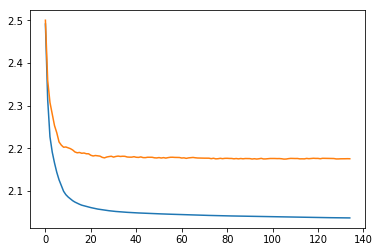

In [466]:
plt.plot(progress['train_set']['rmse'])
plt.plot(progress['validation_set']['rmse'])
plt.show()

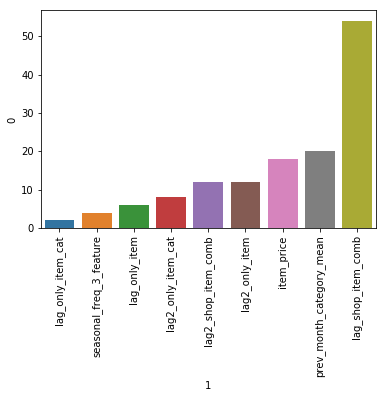

In [471]:
for_plot = pd.DataFrame([(v, k) for k, v in xgb_model_1_05_05.get_fscore().items()])
plt.figure()
for_plot.sort_values(0,inplace=True)
sns.barplot(x = for_plot[1], y =for_plot[0])
plt.xticks(rotation = 90)
plt.show()

In [467]:
params2 = {'max_depth': 2, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}

In [469]:
progress2 = {}
xgb_model_2_001_05 = xgboost.train(params2, xg_cv_train_all_trim,early_stopping_rounds=30,evals = [(xg_cv_train_all_trim , "train_set"),(xg_cv_val_all_trim,"validation_set")], evals_result=progress2
                                         ,num_boost_round=1000)

[0]	train_set-rmse:2.98468	validation_set-rmse:2.91269
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:2.97083	validation_set-rmse:2.90107
[2]	train_set-rmse:2.95725	validation_set-rmse:2.8897
[3]	train_set-rmse:2.94387	validation_set-rmse:2.87856
[4]	train_set-rmse:2.93068	validation_set-rmse:2.86754
[5]	train_set-rmse:2.9177	validation_set-rmse:2.85675
[6]	train_set-rmse:2.9049	validation_set-rmse:2.84612
[7]	train_set-rmse:2.89225	validation_set-rmse:2.8356
[8]	train_set-rmse:2.87984	validation_set-rmse:2.82528
[9]	train_set-rmse:2.86759	validation_set-rmse:2.81514
[10]	train_set-rmse:2.85557	validation_set-rmse:2.80517
[11]	train_set-rmse:2.84371	validation_set-rmse:2.79542
[12]	train_set-rmse:2.83202	validation_set-rmse:2.78577
[13]	train_set-rmse:2.82051	validation_set-rmse:2.77627
[14]	train_set-rmse:2.80923	validation_set-rmse:2.767
[15]	train_se

[144]	train_set-rmse:2.17407	validation_set-rmse:2.24948
[145]	train_set-rmse:2.17237	validation_set-rmse:2.24837
[146]	train_set-rmse:2.17075	validation_set-rmse:2.24712
[147]	train_set-rmse:2.16913	validation_set-rmse:2.24605
[148]	train_set-rmse:2.16759	validation_set-rmse:2.24471
[149]	train_set-rmse:2.1661	validation_set-rmse:2.24384
[150]	train_set-rmse:2.1645	validation_set-rmse:2.2428
[151]	train_set-rmse:2.16301	validation_set-rmse:2.24153
[152]	train_set-rmse:2.1616	validation_set-rmse:2.24032
[153]	train_set-rmse:2.16009	validation_set-rmse:2.23983
[154]	train_set-rmse:2.15859	validation_set-rmse:2.23934
[155]	train_set-rmse:2.15722	validation_set-rmse:2.23822
[156]	train_set-rmse:2.15576	validation_set-rmse:2.2373
[157]	train_set-rmse:2.15426	validation_set-rmse:2.23575
[158]	train_set-rmse:2.1529	validation_set-rmse:2.23457
[159]	train_set-rmse:2.1515	validation_set-rmse:2.23368
[160]	train_set-rmse:2.15013	validation_set-rmse:2.23326
[161]	train_set-rmse:2.14886	validatio

[289]	train_set-rmse:2.06342	validation_set-rmse:2.17673
[290]	train_set-rmse:2.0631	validation_set-rmse:2.17648
[291]	train_set-rmse:2.06284	validation_set-rmse:2.17637
[292]	train_set-rmse:2.06247	validation_set-rmse:2.17633
[293]	train_set-rmse:2.06216	validation_set-rmse:2.17624
[294]	train_set-rmse:2.0619	validation_set-rmse:2.17606
[295]	train_set-rmse:2.0616	validation_set-rmse:2.17583
[296]	train_set-rmse:2.06135	validation_set-rmse:2.17564
[297]	train_set-rmse:2.0609	validation_set-rmse:2.17482
[298]	train_set-rmse:2.06055	validation_set-rmse:2.17478
[299]	train_set-rmse:2.06028	validation_set-rmse:2.17459
[300]	train_set-rmse:2.06002	validation_set-rmse:2.17445
[301]	train_set-rmse:2.05974	validation_set-rmse:2.17421
[302]	train_set-rmse:2.05951	validation_set-rmse:2.17412
[303]	train_set-rmse:2.05927	validation_set-rmse:2.17388
[304]	train_set-rmse:2.05894	validation_set-rmse:2.17385
[305]	train_set-rmse:2.05867	validation_set-rmse:2.17365
[306]	train_set-rmse:2.05845	valida

[434]	train_set-rmse:2.03568	validation_set-rmse:2.15681
[435]	train_set-rmse:2.03561	validation_set-rmse:2.15675
[436]	train_set-rmse:2.03551	validation_set-rmse:2.15674
[437]	train_set-rmse:2.03541	validation_set-rmse:2.15668
[438]	train_set-rmse:2.03522	validation_set-rmse:2.15657
[439]	train_set-rmse:2.0351	validation_set-rmse:2.15656
[440]	train_set-rmse:2.03487	validation_set-rmse:2.15606
[441]	train_set-rmse:2.03477	validation_set-rmse:2.15605
[442]	train_set-rmse:2.03466	validation_set-rmse:2.156
[443]	train_set-rmse:2.03456	validation_set-rmse:2.15595
[444]	train_set-rmse:2.03447	validation_set-rmse:2.15592
[445]	train_set-rmse:2.03438	validation_set-rmse:2.15589
[446]	train_set-rmse:2.03431	validation_set-rmse:2.15585
[447]	train_set-rmse:2.03421	validation_set-rmse:2.1558
[448]	train_set-rmse:2.03414	validation_set-rmse:2.15578
[449]	train_set-rmse:2.03404	validation_set-rmse:2.15575
[450]	train_set-rmse:2.03393	validation_set-rmse:2.15575
[451]	train_set-rmse:2.03385	valida

[579]	train_set-rmse:2.02352	validation_set-rmse:2.14826
[580]	train_set-rmse:2.02348	validation_set-rmse:2.14824
[581]	train_set-rmse:2.02342	validation_set-rmse:2.14825
[582]	train_set-rmse:2.02334	validation_set-rmse:2.14824
[583]	train_set-rmse:2.02328	validation_set-rmse:2.14825
[584]	train_set-rmse:2.02324	validation_set-rmse:2.14821
[585]	train_set-rmse:2.0231	validation_set-rmse:2.14786
[586]	train_set-rmse:2.02295	validation_set-rmse:2.14748
[587]	train_set-rmse:2.02291	validation_set-rmse:2.14744
[588]	train_set-rmse:2.02288	validation_set-rmse:2.14744
[589]	train_set-rmse:2.02282	validation_set-rmse:2.14744
[590]	train_set-rmse:2.02278	validation_set-rmse:2.14742
[591]	train_set-rmse:2.02275	validation_set-rmse:2.14741
[592]	train_set-rmse:2.02271	validation_set-rmse:2.14746
[593]	train_set-rmse:2.02267	validation_set-rmse:2.14748
[594]	train_set-rmse:2.02264	validation_set-rmse:2.14746
[595]	train_set-rmse:2.0226	validation_set-rmse:2.14745
[596]	train_set-rmse:2.02253	vali

[724]	train_set-rmse:2.01484	validation_set-rmse:2.1437
[725]	train_set-rmse:2.01481	validation_set-rmse:2.14368
[726]	train_set-rmse:2.01477	validation_set-rmse:2.14369
[727]	train_set-rmse:2.01475	validation_set-rmse:2.14367
[728]	train_set-rmse:2.01471	validation_set-rmse:2.14367
[729]	train_set-rmse:2.01467	validation_set-rmse:2.14367
[730]	train_set-rmse:2.01463	validation_set-rmse:2.1437
[731]	train_set-rmse:2.0146	validation_set-rmse:2.1437
[732]	train_set-rmse:2.01458	validation_set-rmse:2.14369
[733]	train_set-rmse:2.01455	validation_set-rmse:2.14369
[734]	train_set-rmse:2.01444	validation_set-rmse:2.1436
[735]	train_set-rmse:2.0144	validation_set-rmse:2.14361
[736]	train_set-rmse:2.01438	validation_set-rmse:2.14359
[737]	train_set-rmse:2.01436	validation_set-rmse:2.1436
[738]	train_set-rmse:2.01433	validation_set-rmse:2.14358
[739]	train_set-rmse:2.01428	validation_set-rmse:2.14356
[740]	train_set-rmse:2.01424	validation_set-rmse:2.14355
[741]	train_set-rmse:2.01422	validatio

[869]	train_set-rmse:2.0074	validation_set-rmse:2.13984
[870]	train_set-rmse:2.00738	validation_set-rmse:2.13983
[871]	train_set-rmse:2.00735	validation_set-rmse:2.13982
[872]	train_set-rmse:2.00733	validation_set-rmse:2.13979
[873]	train_set-rmse:2.00731	validation_set-rmse:2.13978
[874]	train_set-rmse:2.00728	validation_set-rmse:2.13979
[875]	train_set-rmse:2.00725	validation_set-rmse:2.13982
[876]	train_set-rmse:2.00723	validation_set-rmse:2.1398
[877]	train_set-rmse:2.0072	validation_set-rmse:2.13978
[878]	train_set-rmse:2.00717	validation_set-rmse:2.1398
[879]	train_set-rmse:2.00714	validation_set-rmse:2.13982
[880]	train_set-rmse:2.00711	validation_set-rmse:2.13981
[881]	train_set-rmse:2.00695	validation_set-rmse:2.13969
[882]	train_set-rmse:2.00692	validation_set-rmse:2.13968
[883]	train_set-rmse:2.00689	validation_set-rmse:2.13967
[884]	train_set-rmse:2.00686	validation_set-rmse:2.13967
[885]	train_set-rmse:2.00684	validation_set-rmse:2.13969
[886]	train_set-rmse:2.00681	valida

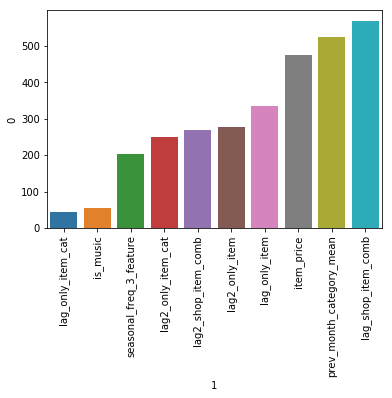

In [470]:
for_plot = pd.DataFrame([(v, k) for k, v in xgb_model_2_001_05.get_fscore().items()])
plt.figure()
for_plot.sort_values(0,inplace=True)
sns.barplot(x = for_plot[1], y =for_plot[0])
plt.xticks(rotation = 90)
plt.show()

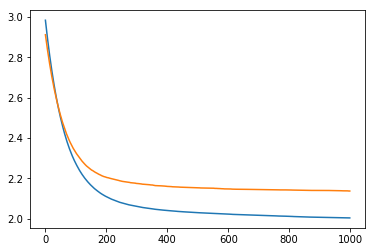

In [472]:
plt.plot(progress2['train_set']['rmse'])
plt.plot(progress2['validation_set']['rmse'])
plt.show()

In [474]:
params3 = {'max_depth': 3, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 1,'eval_metric': 'rmse'}

In [475]:
progress3 = {}
xgb_model_3_001_1 = xgboost.train(params3, xg_cv_train_all_trim,early_stopping_rounds=30,evals = [(xg_cv_train_all_trim , "train_set"),(xg_cv_val_all_trim,"validation_set")], evals_result=progress3
                                         ,num_boost_round=1000)

[0]	train_set-rmse:2.98366	validation_set-rmse:2.91128
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:2.96885	validation_set-rmse:2.89833
[2]	train_set-rmse:2.95426	validation_set-rmse:2.88559
[3]	train_set-rmse:2.93989	validation_set-rmse:2.87305
[4]	train_set-rmse:2.92574	validation_set-rmse:2.86075
[5]	train_set-rmse:2.91181	validation_set-rmse:2.84863
[6]	train_set-rmse:2.89809	validation_set-rmse:2.83672
[7]	train_set-rmse:2.88457	validation_set-rmse:2.825
[8]	train_set-rmse:2.87127	validation_set-rmse:2.81345
[9]	train_set-rmse:2.85817	validation_set-rmse:2.80214
[10]	train_set-rmse:2.84527	validation_set-rmse:2.79102
[11]	train_set-rmse:2.83257	validation_set-rmse:2.78005
[12]	train_set-rmse:2.82017	validation_set-rmse:2.76935
[13]	train_set-rmse:2.80786	validation_set-rmse:2.75874
[14]	train_set-rmse:2.79583	validation_set-rmse:2.74838
[15]	trai

[144]	train_set-rmse:2.12163	validation_set-rmse:2.20284
[145]	train_set-rmse:2.12015	validation_set-rmse:2.20184
[146]	train_set-rmse:2.11864	validation_set-rmse:2.20101
[147]	train_set-rmse:2.1172	validation_set-rmse:2.19999
[148]	train_set-rmse:2.11567	validation_set-rmse:2.19882
[149]	train_set-rmse:2.11423	validation_set-rmse:2.198
[150]	train_set-rmse:2.11265	validation_set-rmse:2.1967
[151]	train_set-rmse:2.1113	validation_set-rmse:2.19592
[152]	train_set-rmse:2.10976	validation_set-rmse:2.19471
[153]	train_set-rmse:2.10846	validation_set-rmse:2.1938
[154]	train_set-rmse:2.10716	validation_set-rmse:2.1929
[155]	train_set-rmse:2.10568	validation_set-rmse:2.1917
[156]	train_set-rmse:2.1044	validation_set-rmse:2.19085
[157]	train_set-rmse:2.10312	validation_set-rmse:2.19021
[158]	train_set-rmse:2.10172	validation_set-rmse:2.18907
[159]	train_set-rmse:2.10054	validation_set-rmse:2.18827
[160]	train_set-rmse:2.09925	validation_set-rmse:2.18729
[161]	train_set-rmse:2.0979	validation_s

[289]	train_set-rmse:2.01784	validation_set-rmse:2.13152
[290]	train_set-rmse:2.01758	validation_set-rmse:2.13139
[291]	train_set-rmse:2.01736	validation_set-rmse:2.13131
[292]	train_set-rmse:2.01704	validation_set-rmse:2.13127
[293]	train_set-rmse:2.01682	validation_set-rmse:2.13107
[294]	train_set-rmse:2.01641	validation_set-rmse:2.13059
[295]	train_set-rmse:2.01616	validation_set-rmse:2.1305
[296]	train_set-rmse:2.01594	validation_set-rmse:2.13038
[297]	train_set-rmse:2.01566	validation_set-rmse:2.13025
[298]	train_set-rmse:2.01528	validation_set-rmse:2.13021
[299]	train_set-rmse:2.01507	validation_set-rmse:2.13013
[300]	train_set-rmse:2.01469	validation_set-rmse:2.12967
[301]	train_set-rmse:2.01448	validation_set-rmse:2.12954
[302]	train_set-rmse:2.01428	validation_set-rmse:2.12942
[303]	train_set-rmse:2.0139	validation_set-rmse:2.12899
[304]	train_set-rmse:2.0137	validation_set-rmse:2.12881
[305]	train_set-rmse:2.01342	validation_set-rmse:2.12878
[306]	train_set-rmse:2.01319	valid

[434]	train_set-rmse:1.99206	validation_set-rmse:2.11652
[435]	train_set-rmse:1.99198	validation_set-rmse:2.1165
[436]	train_set-rmse:1.99181	validation_set-rmse:2.11641
[437]	train_set-rmse:1.99174	validation_set-rmse:2.11642
[438]	train_set-rmse:1.99161	validation_set-rmse:2.11639
[439]	train_set-rmse:1.99154	validation_set-rmse:2.11636
[440]	train_set-rmse:1.99148	validation_set-rmse:2.11637
[441]	train_set-rmse:1.99137	validation_set-rmse:2.11639
[442]	train_set-rmse:1.9913	validation_set-rmse:2.11632
[443]	train_set-rmse:1.99122	validation_set-rmse:2.1163
[444]	train_set-rmse:1.9911	validation_set-rmse:2.11628
[445]	train_set-rmse:1.99103	validation_set-rmse:2.11628
[446]	train_set-rmse:1.99097	validation_set-rmse:2.11624
[447]	train_set-rmse:1.99086	validation_set-rmse:2.11626
[448]	train_set-rmse:1.9908	validation_set-rmse:2.1162
[449]	train_set-rmse:1.99074	validation_set-rmse:2.11619
[450]	train_set-rmse:1.9906	validation_set-rmse:2.11612
[451]	train_set-rmse:1.99055	validatio

[579]	train_set-rmse:1.98023	validation_set-rmse:2.11277
[580]	train_set-rmse:1.9802	validation_set-rmse:2.11278
[581]	train_set-rmse:1.98013	validation_set-rmse:2.11277
[582]	train_set-rmse:1.9801	validation_set-rmse:2.11272
[583]	train_set-rmse:1.98004	validation_set-rmse:2.11269
[584]	train_set-rmse:1.97998	validation_set-rmse:2.11268
[585]	train_set-rmse:1.97994	validation_set-rmse:2.11263
[586]	train_set-rmse:1.97987	validation_set-rmse:2.11265
[587]	train_set-rmse:1.97978	validation_set-rmse:2.11262
[588]	train_set-rmse:1.97974	validation_set-rmse:2.11259
[589]	train_set-rmse:1.97965	validation_set-rmse:2.11258
[590]	train_set-rmse:1.97962	validation_set-rmse:2.11253
[591]	train_set-rmse:1.97957	validation_set-rmse:2.11252
[592]	train_set-rmse:1.97954	validation_set-rmse:2.11253
[593]	train_set-rmse:1.97948	validation_set-rmse:2.11252
[594]	train_set-rmse:1.97942	validation_set-rmse:2.11255
[595]	train_set-rmse:1.97939	validation_set-rmse:2.11252
[596]	train_set-rmse:1.97931	vali

[724]	train_set-rmse:1.9727	validation_set-rmse:2.10782
[725]	train_set-rmse:1.97261	validation_set-rmse:2.10779
[726]	train_set-rmse:1.97252	validation_set-rmse:2.10773
[727]	train_set-rmse:1.9725	validation_set-rmse:2.10773
[728]	train_set-rmse:1.97245	validation_set-rmse:2.10772
[729]	train_set-rmse:1.97242	validation_set-rmse:2.10771
[730]	train_set-rmse:1.97238	validation_set-rmse:2.1077
[731]	train_set-rmse:1.97233	validation_set-rmse:2.10735
[732]	train_set-rmse:1.97226	validation_set-rmse:2.10734
[733]	train_set-rmse:1.97218	validation_set-rmse:2.10727
[734]	train_set-rmse:1.97215	validation_set-rmse:2.10728
[735]	train_set-rmse:1.97211	validation_set-rmse:2.10728
[736]	train_set-rmse:1.97208	validation_set-rmse:2.10727
[737]	train_set-rmse:1.97206	validation_set-rmse:2.10724
[738]	train_set-rmse:1.97199	validation_set-rmse:2.10724
[739]	train_set-rmse:1.97196	validation_set-rmse:2.10723
[740]	train_set-rmse:1.97188	validation_set-rmse:2.1072
[741]	train_set-rmse:1.97179	valida

[869]	train_set-rmse:1.96642	validation_set-rmse:2.10436
[870]	train_set-rmse:1.96641	validation_set-rmse:2.10434
[871]	train_set-rmse:1.96635	validation_set-rmse:2.10432
[872]	train_set-rmse:1.96629	validation_set-rmse:2.10431
[873]	train_set-rmse:1.96627	validation_set-rmse:2.10428
[874]	train_set-rmse:1.96624	validation_set-rmse:2.10424
[875]	train_set-rmse:1.96622	validation_set-rmse:2.10424
[876]	train_set-rmse:1.96618	validation_set-rmse:2.10423
[877]	train_set-rmse:1.96613	validation_set-rmse:2.10423
[878]	train_set-rmse:1.9661	validation_set-rmse:2.10424
[879]	train_set-rmse:1.96606	validation_set-rmse:2.10401
[880]	train_set-rmse:1.96603	validation_set-rmse:2.10401
[881]	train_set-rmse:1.96599	validation_set-rmse:2.10402
[882]	train_set-rmse:1.96592	validation_set-rmse:2.10397
[883]	train_set-rmse:1.96589	validation_set-rmse:2.10396
[884]	train_set-rmse:1.96587	validation_set-rmse:2.10396
[885]	train_set-rmse:1.96585	validation_set-rmse:2.10392
[886]	train_set-rmse:1.96582	val

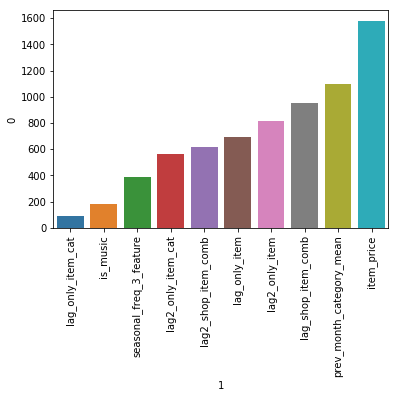

In [476]:
for_plot = pd.DataFrame([(v, k) for k, v in xgb_model_3_001_1.get_fscore().items()])
plt.figure()
for_plot.sort_values(0,inplace=True)
sns.barplot(x = for_plot[1], y =for_plot[0])
plt.xticks(rotation = 90)
plt.show()

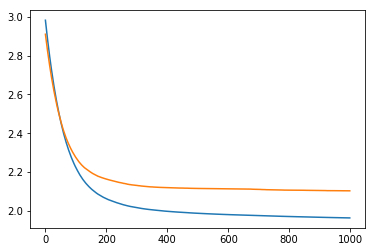

In [477]:
plt.plot(progress3['train_set']['rmse'])
plt.plot(progress3['validation_set']['rmse'])
plt.show()

In [487]:
X_train_for_lm_all_trim = train_33_all_trim.drop(['item_cnt_month','shop_id','item_id','item_category_id','unique'],axis = 1)
y_train_for_lm_all_trim = train_33_all_trim['item_cnt_month']

In [488]:
lm_model_all_trim = LinearRegression()
lm_model_all_trim.fit(X_for_lm_all_trim,y_for_lm_all_trim)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [492]:
train_error_lm = rmse(lm_model_all_trim.predict(X_train_for_lm_all_trim).copy(),y_train_for_lm_all_trim)
train_error_lm

2.1034353666116274

In [494]:
#Finding best alpha
val_set_xg_all_trim = xgb_model_3_001_1.predict(xg_cv_val_all_trim)

In [496]:
val_set_lm_all_trim = lm_model_all_trim.predict(val_33_all_trim.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1))

In [503]:
#First finding best alpha for ensembling on val set. alpha*lin + (1-alpha)*xgb
alphas = np.arange(0,1,0.001)
best_alpha = 0
best_error = rmse(val_set_xg_all_trim.copy(),val_33_all_trim['item_cnt_month'].copy())
for alpha in tqdm(alphas):
    temp_pred = alpha*val_set_lm_all_trim + (1-alpha)*val_set_xg_all_trim
    temp_error = rmse(temp_pred.copy() , val_33_all_trim['item_cnt_month'].copy())
    print(temp_error)
    if (temp_error < best_error):
        print("bazinga")
        best_alpha= alpha
        best_error = temp_error

  4%|▎         | 37/1000 [00:00<00:05, 183.72it/s]

2.101939485843511
2.1019566717722045
2.1019740592801806
2.101991662064348
2.1020094598476313
2.102027467730153
2.102045681386054
2.1020640998982882
2.1020827262451185
2.102101556065309
2.102120583318813
2.102139828681323
2.1021592728900074
2.1021789256565953
2.1021987838854956
2.1022188472094663
2.1022391080139493
2.102259585135538
2.1022802620139496
2.102301146941938
2.1023222363007292
2.102343531822302
2.102365032150347
2.1023867349831393
2.1024086427975224
2.1024307589697213
2.102453084127241
2.102475610646141
2.1024983416427436
2.102521276759931
2.102544418008431
2.102567771367612
2.102591320564888
2.1026150832359214
2.1026390491074625
2.1026632153637377
2.1026875915952226
2.1027121694513786

  7%|▋         | 70/1000 [00:00<00:05, 171.84it/s]


2.102736955070884
2.1027619443771557
2.1027871423282622
2.102812544956021
2.102838148078592
2.1028639574162833
2.102889979470318
2.102916198337436
2.102942626325089
2.102969258795424
2.1029960943356207
2.10302313867609
2.103050385335386
2.1030778367988616
2.103105496929198
2.10313335941788
2.10316142829383
2.103189701512941
2.103218184670997
2.1032468639685127
2.103275757074186
2.103304851097131
2.103334148869448
2.1033636505361755
2.1033933591696146
2.1034232794104826
2.103453397440595
2.103483720838831
2.103514249853886
2.1035449861864466
2.1035759224007102
2.1036070695060545


  8%|▊         | 83/1000 [00:00<00:05, 156.29it/s]

2.10363841867912
2.103669970851135
2.1037017365135076
2.1037336989791426
2.1037658671060115
2.103798242880308
2.1038308199650224
2.103863608408564
2.103896595400958
2.1039297918126687
2.1039631915784023
2.1039967939944737
2.1040306054637603
2.104064619584362
2.1040988375640377
2.1041332627812537
2.104167891532994
2.104202723962431
2.104237765555136
2.104273003588588
2.1043084513024386
2.1043441081895033
2.1043799667614227
2.10441602417812


 11%|█         | 112/1000 [00:00<00:05, 151.54it/s]

2.1044522925513496
2.1044887690254086
2.1045254444128907
2.104562323137515
2.1045994085748925
2.104636701657814
2.1046741976193486
2.1047118996436827
2.104749804983113
2.104787914694793
2.1048262262553448
2.1048647471952076
2.1049034712836474
2.1049423994410614
2.1049815326884374
2.105020871887709
2.105060416285696
2.1051001572889816
2.1051401092057707
2.1051802654725944
2.1052206272320633
2.10526119247281
2.1053019627224083
2.105342935086645
2.105384114045657
2.1054254979336773
2.10546708421478
2.1055088795383936
2.1055508724262615
2.1055930761522683
2.105635484361889


 14%|█▍        | 141/1000 [00:00<00:05, 146.89it/s]

2.1056780915868196
2.105720905694177
2.105763922963423
2.1058071491699883
2.105850577909572
2.105894203750045
2.1059380401343843
2.1059820870561334
2.1060263287949854
2.106070774754918
2.1061154306935603
2.106160286417855
2.106205349422717
2.1062506157166294
2.1062960856109
2.1063417590151343
2.1063876385609324
2.1064337233972785
2.106480013155047
2.1065265019795927
2.106573196071361
2.106620097959282
2.1066672033295646
2.1067145107849106
2.106762023727727
2.106809736597196
2.10685766192809


 17%|█▋        | 173/1000 [00:01<00:05, 144.07it/s]

2.106905781211684
2.1069541121555644
2.107002644740402
2.107051377459072
2.107100322962691
2.1071494674467655
2.1071988141367917
2.107248363959094
2.107298122425197
2.107348084275527
2.1073982471348747
2.1074486132374384
2.1074991840944652
2.107549966707214
2.1076009412707424
2.1076521285745407
2.107703516322374
2.1077551111646797
2.1078069039720226
2.1078589000007653
2.1079111032685875
2.107963507675727
2.10801612173638
2.108068935303423
2.108121954434088


 20%|██        | 204/1000 [00:01<00:05, 144.82it/s]

2.1081751690727035
2.108228595402368
2.108282227677473
2.108336059244433
2.1083900959086113
2.1084443346861867
2.1084987814012104
2.1085534237536936
2.108608273617891
2.1086633289347474
2.108718586094892
2.1087740488319766
2.1088297127994644
2.108885581249658
2.108941649175382
2.108997925991607
2.1090544069438426
2.1091110899824086
2.109167973570675
2.1092250582619445
2.1092823567539756
2.1093398489842565
2.1093975476911475
2.10945544968259
2.109513555629623
2.1095718647132715
2.1096303771788136
2.1096890888452102
2.109748009985174
2.1098071281314734


 24%|██▎       | 235/1000 [00:01<00:05, 145.35it/s]

2.109866457631187
2.109925986439384
2.109985716252421
2.1100456471817175
2.1101057886007446
2.1101661327146326
2.1102266735006707
2.1102874214713725
2.1103483683280775
2.1104095242478005
2.1104708801625898
2.110532437277837
2.11059420007528
2.1106561665761747
2.1107183355035564
2.110780705502822
2.11084327941564
2.110906052374911
2.1109690383259676
2.1110322188258595
2.1110956041162927
2.1111591909063905
2.1112229782731644
2.1112869812312227
2.111351171836184
2.1114155728346504
2.1114801770013214
2.1115449843665157
2.1116099912215365
2.11167520007283
2.1117406112076824


 27%|██▋       | 268/1000 [00:01<00:04, 146.84it/s]

2.1118062268727953
2.1118720479989586
2.1119380694001046
2.1120042948983144
2.112070717116365
2.1121373433178716
2.11220418148085
2.1122712136410007
2.1123384481725647
2.112405883133104
2.1124735309745115
2.112541372951422
2.1126094144110783
2.1126776654695747
2.1127461150652653
2.112814771754335
2.112883624890784
2.112952683522897
2.113021944361463
2.113091409891871
2.113161073402654
2.113230939158378
2.1133010087454043
2.1133712794229944
2.1134417569518718
2.1135124327329082
2.1135833079027555
2.1136543861815267
2.1137256691878665
2.1137971562618714
2.1138688401814365
2.1139407298588897


 28%|██▊       | 284/1000 [00:01<00:04, 147.21it/s]

2.114012816290735
2.114085116179263
2.1141576061799885
2.114230301756158
2.1143032007614426
2.1143762974970843
2.1144496053566115
2.1145231080692137
2.11459681608629
2.1146707194791197
2.1147448313766564
2.114819145926746
2.1148936558154805
2.1149683704388895
2.115043287416543
2.1151184095674798
2.1151937243868026
2.1152692464863696
2.1153449694892843
2.115420893491085
2.115497023435402
2.115573350003739
2.1156498774805312
2.1157266086161113
2.1158035453232107
2.1158806774655505
2.1159580163081495


 32%|███▏      | 315/1000 [00:02<00:04, 144.17it/s]

2.11603554702429
2.1161132854925957
2.1161912277118033
2.11626936871229
2.1163477135365922
2.116426259012613
2.1165050002770496
2.116583950538603
2.116663096344508
2.116742444414556
2.1168219975842533
2.1169017486852555
2.1169817037524505
2.1170618557821532
2.1171422063157164
2.11722276214122
2.117303522064237
2.1173844812028446
2.1174656374586673
2.117546998589039
2.1176285565909696
2.1177103230814476
2.1177922843444663
2.1178744484052547


 34%|███▍      | 342/1000 [00:02<00:04, 141.12it/s]

2.117956812481432
2.118039382451174
2.1181221494742153
2.11820511566996
2.1182882829609606
2.1183716509525357
2.118455225950715
2.118538997027718
2.1186229662965625
2.1187071352108857
2.118791507769965
2.1188760868994296
2.118960854898621
2.119045830293355
2.1191310051585313
2.1192163871825795
2.1193019588825996
2.1193877356015967
2.119473711713427
2.119559886786821
2.119646268261619
2.119732846906445
2.1198196244296605
2.1199066022520134
2.1199937861247378


 37%|███▋      | 369/1000 [00:02<00:04, 139.16it/s]

2.120081168009085
2.120168746554026
2.1202565223266867
2.120344503838085
2.120432688677529
2.1205210660568894
2.1206096452804726
2.1206984269753706
2.120787406557672
2.120876592317218
2.1209659718295746
2.121055553673928
2.121145331808825
2.1212353172178666
2.1213254978600253
2.121415877796805
2.121506455282374
2.1215972363991216
2.1216882233191
2.121779403782463
2.121870779906778
2.1219623618772476
2.1220541412051497


 40%|███▉      | 399/1000 [00:02<00:04, 139.66it/s]

2.1221461260242984
2.122238302501945
2.122330680898664
2.1224232574680784
2.1225160403725223
2.122609016913133
2.1227021947778577
2.1227955681583204
2.1228891405753583
2.1229829231910378
2.1230768977795362
2.123171071345037
2.123265443489407
2.1233600211014356
2.1234547933145693
2.1235497625443283
2.123644933358228
2.1237403028112465
2.123835877922727
2.1239316461221613
2.1240276156027713
2.124123782288808
2.124220145985083
2.12431671632107
2.1244134800717958
2.1245104441961224
2.1246076035302943
2.1247049717037085
2.1248025314571763
2.124900290998824


 43%|████▎     | 434/1000 [00:03<00:03, 141.78it/s]

2.124998245477974
2.125096401580928
2.125194764610876
2.1252933174772113
2.1253920698192026
2.1254910216936014
2.125590172329388
2.1256895272982574
2.1257890753374653
2.125888822336038
2.1259887676063816
2.1260889158424314
2.1261892588234206
2.126289800202133
2.1263905394451768
2.1264914767272076
2.126592621744096
2.1266939545441734
2.1267954879874877
2.1268972188101385
2.126999156081851
2.127101281424067
2.127203609295233
2.127306133695772
2.1274088575990118
2.127511783682517
2.1276149040525336
2.1277182217995585
2.127821738681177
2.1279254494926603
2.1280293676587303
2.128133478907673
2.128237785044266
2.128342290585973
2.128447002938276


 45%|████▌     | 450/1000 [00:03<00:03, 141.07it/s]

2.128551906404342
2.128657005042945
2.1287623019694366
2.1288677971702104
2.1289734965754694
2.1290793856759587
2.1291854764817653
2.12929176187167
2.129398243940841
2.129504933081902
2.1296118125077306
2.1297188882749136
2.129826161358962
2.1299336430184477
2.130041311293841
2.1301491784713953
2.1302572427705413
2.130365504185132
2.1304739704913676
2.130582625461359
2.1306914790586724
2.130800530310016
2.130909778027809
2.131019231538398
2.1311288747583883
2.131238714680923


 48%|████▊     | 479/1000 [00:03<00:03, 139.97it/s]

2.131348751808657
2.1314589898599126
2.131569424572889
2.1316800533838847
2.131790875971862
2.1319018992026106
2.1320131275539653
2.1321245435936698
2.1322361542225465
2.1323479650813555
2.132459979307191
2.1325721807803455
2.132684580194299
2.132797180896347
2.132909973948056
2.1330229715096514
2.1331361588511344
2.133249542646957
2.1333631229768275
2.1334768993821043
2.1335908778586403
2.13370505007365
2.1338194140600826
2.1339339792243495
2.13404874430933
2.1341637031261618
2.1342788526767884


 51%|█████     | 508/1000 [00:03<00:03, 139.95it/s]

2.134394201606614
2.134509745160819
2.13462549514092
2.1347414291401807
2.1348575636030005
2.13497389206331
2.1350904149165126
2.13520714567843
2.1353240659838617
2.13544117804072
2.1355584864431227
2.135675998212267
2.1357937012149057
2.1359115974067877
2.136029689418069
2.13614798256785
2.1362664678084538
2.136385151430331
2.1365040250610803
2.1366231010948624
2.1367423711978883
2.136861832355561
2.1369814951798514
2.1371013508014443
2.1372214044248614
2.1373416477027134
2.137462092091651
2.137582728068479


 54%|█████▎    | 537/1000 [00:03<00:03, 139.63it/s]

2.1377035592227873
2.1378245893753345
2.1379458148714363
2.138067235745937
2.138188847966506
2.1383106589636354
2.1384326627849624
2.1385548643084165
2.138677257375115
2.138799845889769
2.138922632702116
2.139045611932945
2.1391687881251427
2.139292160563467
2.139415726431846
2.1395394844729267
2.13966343674295
2.1397875885790913
2.139911930774294
2.1400364710703017
2.1401612046062417
2.140286136175737
2.140411257229113
2.140536572902054
2.1406620862784083
2.1407877943207567
2.1409136971328735
2.1410397917908957

 57%|█████▋    | 568/1000 [00:04<00:03, 140.16it/s]


2.1411660836121142
2.1412925690662004
2.1414192444177513
2.1415461217952494
2.141673187504511
2.141800451405324
2.141927904602949
2.142055557923474
2.1421834033170626
2.1423114401420245
2.1424396754927786
2.1425681014901428
2.1426967258614287
2.142825537756446
2.1429545477043668
2.1430837502043802
2.1432131461995922
2.1433427374923184
2.1434725211630883
2.143602503696162
2.14373267381852
2.143863040646496
2.1439935967915402
2.1441243549348252
2.1442552979834884
2.1443864375931527
2.144517773213641
2.144649299110295
2.144781022120463
2.144912935923515


 60%|██████    | 600/1000 [00:04<00:02, 140.55it/s]

2.1450450442532736
2.1451773452973977
2.1453098371757755
2.1454425264740857
2.145575407897172
2.1457084837550147
2.1458417497817757
2.1459752110230057
2.1461088638119734
2.146242708081605
2.1463767488020284
2.1465109828359816
2.146645410182061
2.1467800269179835
2.1469148403389
2.147049844719413
2.147185038384093
2.1473204312104683
2.147456012685789
2.1475917878907844
2.1477277556950325
2.1478639181787478
2.14800027099823
2.1481368153367217
2.1482735564655586
2.1484104841785236
2.1485476092123306
2.1486849240427808
2.1488224338726774
2.1489601323321263
2.1490980238912334
2.1492361127144775


 63%|██████▎   | 632/1000 [00:04<00:02, 140.60it/s]

2.149374386723601
2.149512861402263
2.149651521034812
2.14979037485102
2.1499294192025156
2.150068658911924
2.1502080883688315
2.1503477072914565
2.1504875243462016
2.1506275288257832
2.150767729820966
2.150908116194506
2.1510486995903415
2.151189471176636
2.1513304339174946
2.1514715928363684
2.151612939443131
2.151754482006099
2.151896210632459
2.152038135835013
2.152180245173708
2.152322550695161
2.152465049308657
2.1526077376845185
2.1527506191930232
2.1528936891817003
2.153036953814955
2.153180405264593


 66%|██████▌   | 662/1000 [00:04<00:02, 140.64it/s]

2.153324048701005
2.153467884886232
2.1536119095940727
2.1537561300316956
2.1539005384825898
2.1540451403583596
2.15418993114894
2.1543349117458934
2.1544800851423256
2.1546254479350946
2.1547710020137454
2.1549167465270616
2.155062684412016
2.155208808535012
2.1553551285420856
2.1555016361413672
2.15564833078689
2.1557952214165668
2.155942302038846
2.156089571654023
2.1562370299585396
2.156384682520321
2.1565325228966485
2.1566805511450964
2.1568287751909847
2.1569771849546346
2.15712578750041
2.1572745777465294
2.1574235620168034


 68%|██████▊   | 677/1000 [00:04<00:02, 140.10it/s]

2.1575727332657633
2.1577220934141352
2.157871649076516
2.1580213881064165
2.15817132309663
2.1583214415096252
2.158471756901679
2.1586222554756747
2.1587729439771297
2.158923827269964
2.159074895776505
2.1592261600890597
2.159377605912966
2.15952924812145
2.159681073616724
2.159833090720674
2.1599853001259306
2.160137695060808
2.1602902833834325
2.1604430560077033
2.1605960244633486
2.160749175681766
2.1609025192140066
2.1610560529020275
2.1612097725170067
2.1613636854340235


 70%|███████   | 705/1000 [00:05<00:02, 139.67it/s]

2.1615177823974947
2.161672072955805
2.1618265488849118
2.1619812165578094
2.162136069272196
2.1622911116940275
2.1624463472203317
2.1626017682117364
2.1627573793779677
2.1629131772591146
2.1630691666631594
2.1632253413517626
2.1633817022840938
2.16353825767335
2.163694997158128
2.1638519295233216
2.1640090461814405
2.164166354234154
2.1643238478906763
2.1644815286634524
2.164639402815426
2.1647974602003064
2.1649557088294737
2.1651141431608343
2.1652727689595346
2.165431579324692


 73%|███████▎  | 733/1000 [00:05<00:01, 139.21it/s]

2.1655905762287597
2.1657497666304852
2.1659091391162266
2.166068706757432
2.1662284551912534
2.1663883959453565
2.1665485207519506
2.1667088315713547
2.1668693359627134
2.167030022129976
2.167190902485073
2.167351965091544
2.167513219207315
2.167674655615373
2.1678362798365427
2.1679980970042783
2.168160096340251
2.1683222872272374
2.1684846596802547
2.1686472264187793
2.1688099730463652
2.168972912901866
2.169136033244197
2.169299343786301
2.1694628443754547
2.1696265272121042
2.1697903998751396
2.1699544561457076


 76%|███████▌  | 760/1000 [00:05<00:01, 138.48it/s]

2.170118704835472
2.1702831353457315
2.1704477518051344
2.1706125592358005
2.1707775494179176
2.170942730377497
2.171108094237511
2.1712736470992953
2.1714393834238015
2.1716053079715643
2.171771418713667
2.1719377150885784
2.172104196792915
2.1722708674891837
2.1724377226492737
2.1726047643614215
2.1727719923495985
2.1729394083007683
2.173107007750718
2.17327479388207
2.1734427634940214
2.173610921541706
2.1737792670473026
2.1739477957597644


 79%|███████▊  | 787/1000 [00:05<00:01, 137.94it/s]

2.1741165104421403
2.174285410812034
2.17445449853592
2.174623767981235
2.1747932266067895
2.174962869785123
2.175132699447289
2.1753027135248826
2.1754729127611037
2.175643297362262
2.175813866529217
2.1759846225840414
2.1761555634242558
2.1763266892201694
2.1764980001441776
2.17666949798623
2.176841178474071
2.1770130455266448
2.1771850939893502
2.1773573302536047
2.1775297520989545
2.1777023581147925
2.177875148313028
2.178048124758692
2.1782212846372175
2.178394627317342
2.178568157686757
2.17874187153274

 81%|████████▏ | 814/1000 [00:05<00:01, 137.72it/s]


2.1789157710054377
2.1790898537190766
2.1792641201008514
2.1794385726218373
2.1796132073773777
2.1797880276063344
2.1799630323773562
2.18013822119504
2.180313595521381
2.1804891537779287
2.1806648937988875
2.18084081928004
2.181016926492271
2.1811932208859366
2.1813696982130844
2.1815463595923026
2.181723204754339
2.1819002342663865
2.1820774466967325
2.182254839731728
2.1824324203248744
2.1826101840899357
2.1827881311480115
2.1829662609488185
2.1831445749115113
2.183323072870058
2.1835017525630604


 84%|████████▍ | 844/1000 [00:06<00:01, 137.75it/s]

2.183680616393155
2.1838596630859857
2.1840388934218873
2.1842183084363525
2.184397904364708
2.1845776846993936
2.1847576478313546
2.184937791768746
2.1851181210879074
2.1852986323709755
2.1854793279032476
2.1856602062935195
2.1858412666804092
2.1860225100038555
2.186203932785342
2.186385541503388
2.1865673327912947
2.186749306286959
2.186931462817836
2.1871138013547835
2.187296322694655
2.1874790246041624
2.1876619099707573
2.1878449778014892
2.188028228342343
2.188211660120056
2.1883952753055937


 87%|████████▋ | 872/1000 [00:06<00:00, 137.49it/s]

2.1885790721002265
2.1887630513439644
2.1889472092838504
2.189131552084685
2.1893160771230606
2.1895007836960345
2.18968567226641
2.189870741714078
2.190055993915357
2.1902414251089
2.1904270401324006
2.190612837763489
2.190798816099187
2.190984975428827
2.1911713168036604
2.191357839653519
2.1915445407450997
2.191731426747328
2.1919184928485986
2.1921057409297457
2.192293169358004
2.1924807805358735
2.1926685710527187
2.192856543785149
2.1930446947482545
2.1932330288910125
2.19342154446849
2.193610240020021


 90%|█████████ | 901/1000 [00:06<00:00, 137.27it/s]

2.1937991166352195
2.193988172751054
2.1941774111079417
2.1943668297225907
2.1945564297305347
2.1947462083897
2.1949361699266543
2.1951263101249965
2.195316631778636
2.1955071324256306
2.1956978148327306
2.195888676848777
2.196079718547345
2.196270941552726
2.1964623441749165
2.1966539275211083
2.1968456894147543
2.197037632886686
2.1972297556534754
2.1974220589236353
2.197614540936469
2.197807203916718
2.1980000455281927
2.198193067124579
2.1983862686633717
2.1985796505441466


 92%|█████████▏| 915/1000 [00:06<00:00, 136.58it/s]

2.1987732112498017
2.198966950559404
2.1991608710762027
2.1993549706618065
2.199549249840913
2.199743706689794
2.1999383443879474
2.200133160735487
2.200328156386772
2.200523330978888
2.2007186856695755
2.200914218555645
2.2011099297089594
2.201305820690919
2.2015018915492943
2.201698140575739
2.2018945668615983
2.2020911734400226
2.202287958850321
2.202484922154747
2.2026820644195797
2.202879385385835
2.2030768854194385


 94%|█████████▍| 943/1000 [00:06<00:00, 136.51it/s]

2.203274562384652
2.2034724192436643
2.203670454416636
2.203868667607833
2.2040670579507644
2.2042656282919655
2.2044643761944425
2.2046633009895196
2.204862405403091
2.205061687611123
2.205261148172207
2.205460785563399
2.205660602040983
2.2058605958716426
2.2060607671624664
2.2062611169718043
2.2064616441280984
2.206662348830759
2.206863230972878
2.207064290440691
2.2072655280130498
2.2074669426378155
2.207668535206684
2.207870304816508
2.2080722517982716
2.2082743758575467
2.208476677644872
2.2086791561516943
2.208881812395958


 97%|█████████▋| 971/1000 [00:07<00:00, 136.05it/s]

2.2090846449029624
2.2092876546774933
2.2094908417840697
2.209694205079055
2.209897746254161
2.2101014632520597
2.210305357855113
2.2105094286216374
2.2107136766545454
2.2109181007630823
2.2111227019744644
2.211327479292533
2.211532432723674
2.211737563382214
2.2119428700913413
2.212148353523232
2.212354013033868
2.212559848747563
2.212765860303983
2.2129720482738575
2.213178412498813
2.2133849525603413
2.2135916688054516
2.213798560974054
2.214005629049671


100%|██████████| 1000/1000 [00:07<00:00, 135.74it/s]

2.214212872910451
2.214420292471602
2.2146278879140717
2.2148356590460745
2.2150436054624403
2.215251727914562
2.2154600260233592
2.215668499308398
2.215877148219544
2.21608597249773
2.2162949722017102
2.2165041471001037
2.2167134973284117
2.216923022604223
2.2171327231933353
2.2173425988782474
2.2175526496162354
2.2177628753004135
2.217973276013987
2.218183851594861
2.2183946020544782


In [500]:
best_error

2.101939485843511

In [501]:
best_alpha

0

In [505]:
submit_req.loc[submit_req['lag_shop_item_comb']>20,'lag_shop_item_comb'] = 20
submit_req.loc[submit_req['lag_only_item']>20,'lag_only_item'] = 20
submit_req.loc[submit_req['lag_only_item_cat']>20,'lag_only_item_cat'] = 20
submit_req.loc[submit_req['lag2_only_item_cat']>20,'lag2_only_item_cat'] = 20
submit_req.loc[submit_req['lag2_shop_item_comb']>20,'lag2_shop_item_comb'] = 20
submit_req.loc[submit_req['lag2_only_item']>20,'lag2_only_item'] = 20
submit_req.loc[submit_req['prev_month_category_mean']>20,'prev_month_category_mean'] = 20

In [506]:
submit_req_all_trim = submit_req.copy()

In [524]:
submit_req_all_trim = submit_req_all_trim[xg_cv_full_all_trim.feature_names]

In [525]:
submit_req_xg = xgboost.DMatrix(submit_req_all_trim)

In [510]:
progress_final = {}

In [512]:
xg_cv_full_all_trim.feature_names

['item_price',
 'is_music',
 'lag_shop_item_comb',
 'lag_only_item',
 'lag_only_item_cat',
 'lag2_only_item_cat',
 'lag2_shop_item_comb',
 'lag2_only_item',
 'seasonal_freq_3_feature',
 'prev_month_category_mean']

In [518]:
xg_cv_full_all_trim.get_label().shape

(31531,)

In [515]:
xg_cv_full_all_trim.num_row()

1545898

In [520]:
xg_fin_all_trim = xgboost.train(params3,xg_cv_full_all_trim, num_boost_round=1000)

In [521]:
lm_fin_all_trim = LinearRegression().fit(train_full_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), train_full_imputed['item_cnt_month'])

In [526]:
test_pred_xg_all_trim = xg_fin_all_trim.predict(submit_req_xg)

In [532]:
test_pred_lin_all_trim = lm_fin_all_trim.predict(submit_req_all_trim)

In [533]:
len(np.unique(test_pred_lin_all_trim))

23703

In [535]:
#Ensembling for no reason.
fin_ens_sub = test_pred_xg_all_trim + 0.01*test_pred_lin_all_trim

In [538]:
len(np.unique(test_pred_xg_all_trim))/len(np.unique(test_pred_lin_all_trim))

0.5600978779057503

In [534]:
len(fin_ens_sub)

214200

In [539]:
check = pd.read_csv('sep5_less_005.csv')

In [540]:
len(np.unique(check['item_cnt_month']))

10333

In [542]:
len(np.unique(fin_ens_sub))

23696

In [543]:
rmse(fin_ens_sub,check['item_cnt_month'])

1.7009710517111283

In [544]:
submit_all_trim = pd.DataFrame({'ID':test_imputed_new_prev_cat_mean['ID'],'item_cnt_month':fin_ens_sub})

In [546]:
submit_all_trim.to_csv('submit_all_trim.csv', index = False)

In [551]:
#Training on non-trim, but with imputation and new feature.

No trimming

In [610]:
#Okay no trimming dint work and wasnt the brightest of ideas. LR was significantly being hurted as the trend was getting
#distorted, xg also. Lets see now.
train_full_no_trim = pd.read_csv('train_imputed_pre_category_mean_no_trim.csv')
np.sum(pd.isnull(train_full_no_trim),axis = 0)

shop_id                         0
item_id                         0
unique                          0
item_price                      0
item_cnt_month                  0
item_category_id                0
is_music                        0
lag_shop_item_comb              0
lag_only_item                   0
lag_only_item_cat               0
lag2_only_item_cat              0
lag2_shop_item_comb             0
lag2_only_item                  0
seasonal_freq_3_feature         0
prev_month_category_mean    64373
dtype: int64

In [611]:
train_full_no_trim = train_full_no_trim[train_full_no_trim['unique']!=0]

In [612]:
np.sum(pd.isnull(train_full_no_trim),axis = 0)

shop_id                        0
item_id                        0
unique                         0
item_price                     0
item_cnt_month                 0
item_category_id               0
is_music                       0
lag_shop_item_comb             0
lag_only_item                  0
lag_only_item_cat              0
lag2_only_item_cat             0
lag2_shop_item_comb            0
lag2_only_item                 0
seasonal_freq_3_feature        0
prev_month_category_mean    1149
dtype: int64

In [613]:
train_full_no_trim.fillna(0, inplace=True)

In [614]:
np.sum(pd.isnull(train_full_no_trim),axis = 0)

shop_id                     0
item_id                     0
unique                      0
item_price                  0
item_cnt_month              0
item_category_id            0
is_music                    0
lag_shop_item_comb          0
lag_only_item               0
lag_only_item_cat           0
lag2_only_item_cat          0
lag2_shop_item_comb         0
lag2_only_item              0
seasonal_freq_3_feature     0
prev_month_category_mean    0
dtype: int64

In [560]:
test_imputed_new_prev_cat_mean.describe()

,shop_id,ID,item_id,item_category_id,indicator,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,lag_only_item_cat,lag_shop_item_comb,seasonal_freq_3_feature,unique,prev_month_category_mean,item_price
count,214200.000000,214200.000000,214200.000000,198954.000000,214200.000000,198954.000000,198954.000000,198954.000000,198954.000000,198954.000000,198954.000000,1.989540e+05,214200.0,198954.000000,198954.000000
mean,31.642857,107099.500000,11019.398627,46.293857,0.913338,1.488493,2.070880,0.295666,14.308001,3221.669411,0.315897,-4.751237e-02,34.0,1.922926,1024.694028
std,17.561933,61834.358168,6252.644590,16.692867,0.589016,6.389240,4.747874,2.591761,78.117763,2646.745049,5.759122,1.315618e-13,0.0,1.160314,1979.721806
min,2.000000,0.000000,30.000000,2.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,3.000000,-1.000000,-4.751237e-02,34.0,1.000000,4.895753
25%,16.000000,53549.750000,5381.500000,37.000000,1.000000,1.000000,1.275641,0.000000,1.000000,888.000000,0.000000,-4.751237e-02,34.0,1.349535,281.109010
50%,34.500000,107099.500000,11203.000000,43.000000,1.000000,1.000000,1.555887,0.000000,4.000000,2290.000000,0.000000,-4.751237e-02,34.0,1.635682,488.362500
75%,47.000000,160649.250000,16071.500000,58.000000,1.000000,1.363636,2.013889,0.000000,12.000000,5808.000000,0.000000,-4.751237e-02,34.0,2.122924,1247.578836
max,59.000000,214199.000000,22167.000000,83.000000,2.000000,258.000000,102.000000,473.000000,4078.000000,7680.000000,2253.000000,-4.751237e-02,34.0,20.000000,40453.407407


In [616]:
submit['seasonal_freq_3_feature'] = -4.751237e-02

In [617]:
np.sum(pd.isnull(submit),axis = 0)

shop_id                         0
ID                              0
item_id                         0
item_category_id            15246
indicator                       0
is_music                        0
lag2_only_item                  0
lag2_only_item_cat              0
lag2_shop_item_comb             0
lag_only_item                   0
lag_only_item_cat               0
lag_shop_item_comb              0
seasonal_freq_3_feature         0
unique                          0
prev_month_category_mean        0
item_price                      0
neigbor1                        0
neigbor10                       0
neigbor11                       0
neigbor12                       0
neigbor13                       0
neigbor14                       0
neigbor15                       0
neigbor2                        0
neigbor3                        0
neigbor4                        0
neigbor5                        0
neigbor6                        0
neigbor7                        0
neigbor8      

In [619]:
test_full_no_trim = submit[train_full_no_trim.drop('item_cnt_month', axis = 1).columns].copy()

In [620]:
test_full_no_trim.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_category_id',
       'is_music', 'lag_shop_item_comb', 'lag_only_item', 'lag_only_item_cat',
       'lag2_only_item_cat', 'lag2_shop_item_comb', 'lag2_only_item',
       'seasonal_freq_3_feature', 'prev_month_category_mean'],
      dtype='object')

In [621]:
np.sum(pd.isnull(train_full_no_trim),axis = 0)

shop_id                     0
item_id                     0
unique                      0
item_price                  0
item_cnt_month              0
item_category_id            0
is_music                    0
lag_shop_item_comb          0
lag_only_item               0
lag_only_item_cat           0
lag2_only_item_cat          0
lag2_shop_item_comb         0
lag2_only_item              0
seasonal_freq_3_feature     0
prev_month_category_mean    0
dtype: int64

In [622]:
#No tuning, starting with params 3

In [641]:
check_train = pd.read_csv('train_full_lag1_lag2_season.csv')

In [625]:
xg_train_set_no_trim = xgboost.DMatrix(train_full_no_trim.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_full_no_trim['item_cnt_month'])



In [642]:
check_xg = xgboost.DMatrix(check_train.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=check_train['item_cnt_month'])



In [644]:
train_tune, val_tune = month_split(train_full_no_trim,33)

In [645]:
train_tune_check, val_tune_check = month_split(check_train,33)

In [637]:
xg_train_tune = xgboost.DMatrix(train_tune.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_tune['item_cnt_month'])
xg_val_tune = xgboost.DMatrix(val_tune.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=val_tune['item_cnt_month'])


In [646]:
xg_train_tune_check = xgboost.DMatrix(train_tune_check.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_tune_check['item_cnt_month'])
xg_val_tune_check = xgboost.DMatrix(val_tune_check.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=val_tune_check['item_cnt_month'])


In [647]:
params3['max_depth'] = 3

In [651]:
sum(pd.isnull(check_train['item_cnt_month']))

0

In [670]:
train_full_no_trim.loc[1609096,:]

shop_id                            59
item_id                         20335
unique                             33
item_price                       1149
item_cnt_month                      2
item_category_id                   72
is_music                        False
lag_shop_item_comb                  1
lag_only_item                       9
lag_only_item_cat                1258
lag2_only_item_cat            1.34424
lag2_shop_item_comb                 0
lag2_only_item                      1
seasonal_freq_3_feature    -0.0637649
prev_month_category_mean      1.38699
Name: 1609096, dtype: object

In [671]:
check_train[check_train['unique']!=0].loc[1609096,:]

Unnamed: 0                   1609096
shop_id                           59
item_id                        20335
unique                            33
item_price                      1149
item_cnt_month                     1
item_category_id                  72
is_music                       False
lag_shop_item_comb                 1
lag_only_item                      9
lag_only_item_cat               1258
lag2_only_item_cat           1.34424
lag2_shop_item_comb              NaN
lag2_only_item                     1
seasonal_freq_3_feature   -0.0637649
Name: 1609096, dtype: object

In [666]:
train_full_no_trim['item_cnt_month']==check_train[check_train['unique']!=0]['item_cnt_month']

63224       True
63225       True
63226       True
63227       True
63228       True
63229       True
63230       True
63231       True
63232       True
63233       True
63234       True
63235       True
63236       True
63237       True
63238       True
63239       True
63240       True
63241       True
63242       True
63243       True
63244       True
63245       True
63246       True
63247       True
63248       True
63249       True
63250       True
63251       True
63252       True
63253       True
           ...  
1609092     True
1609093     True
1609094     True
1609095     True
1609096    False
1609097     True
1609098    False
1609099    False
1609100    False
1609101    False
1609102     True
1609103    False
1609104    False
1609105    False
1609106    False
1609107    False
1609108     True
1609109    False
1609110    False
1609111     True
1609112    False
1609113    False
1609114     True
1609115    False
1609116     True
1609117    False
1609118     True
1609119     Tr

In [648]:
progress1 = {}
xg_no_trim_prev_cat_imputed_1 = xgboost.train(params3, xg_train_tune_check,early_stopping_rounds=30,evals = [(xg_train_tune_check , "train_set"),(xg_val_tune_check,"validation_set")], evals_result=progress
                                         ,num_boost_round=1000)

[0]	train_set-rmse:8.62895	validation_set-rmse:14.6142
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:8.58568	validation_set-rmse:14.5903
[2]	train_set-rmse:8.54304	validation_set-rmse:14.5664
[3]	train_set-rmse:8.501	validation_set-rmse:14.5403
[4]	train_set-rmse:8.45956	validation_set-rmse:14.5172
[5]	train_set-rmse:8.41858	validation_set-rmse:14.4919
[6]	train_set-rmse:8.37816	validation_set-rmse:14.4699
[7]	train_set-rmse:8.33843	validation_set-rmse:14.445
[8]	train_set-rmse:8.29913	validation_set-rmse:14.4238
[9]	train_set-rmse:8.26064	validation_set-rmse:14.4029
[10]	train_set-rmse:8.2228	validation_set-rmse:14.3858
[11]	train_set-rmse:8.18509	validation_set-rmse:14.3646
[12]	train_set-rmse:8.14789	validation_set-rmse:14.3442
[13]	train_set-rmse:8.1113	validation_set-rmse:14.3243
[14]	train_set-rmse:8.07499	validation_set-rmse:14.3049
[15]	train_s

[144]	train_set-rmse:5.95401	validation_set-rmse:12.3058
[145]	train_set-rmse:5.94849	validation_set-rmse:12.3031
[146]	train_set-rmse:5.94269	validation_set-rmse:12.3024
[147]	train_set-rmse:5.93698	validation_set-rmse:12.2985
[148]	train_set-rmse:5.93109	validation_set-rmse:12.3014
[149]	train_set-rmse:5.92553	validation_set-rmse:12.3008
[150]	train_set-rmse:5.92015	validation_set-rmse:12.2972
[151]	train_set-rmse:5.91475	validation_set-rmse:12.2966
[152]	train_set-rmse:5.90977	validation_set-rmse:12.279
[153]	train_set-rmse:5.90475	validation_set-rmse:12.2762
[154]	train_set-rmse:5.89957	validation_set-rmse:12.2756
[155]	train_set-rmse:5.89466	validation_set-rmse:12.2738
[156]	train_set-rmse:5.88964	validation_set-rmse:12.2732
[157]	train_set-rmse:5.88487	validation_set-rmse:12.2716
[158]	train_set-rmse:5.8799	validation_set-rmse:12.2708
[159]	train_set-rmse:5.87505	validation_set-rmse:12.2687
[160]	train_set-rmse:5.87023	validation_set-rmse:12.2679
[161]	train_set-rmse:5.86561	vali